In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [415]:
df = pd.read_csv('healthcare_dataset_new.csv')

In [416]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [417]:
df.shape

(55500, 15)

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [419]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224655    202.000000
50%       52.000000    25538.069380    302.000000
75%       68.000000    37820.508432    401.000000
max       89.000000    52764.276740    500.000000

In [420]:
df.isnull().sum().sum()

0

In [421]:
df.duplicated().sum()

534

In [422]:
df = df.drop_duplicates()

In [423]:
df.duplicated().sum()

0

In [424]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [425]:
cat_columns = df.select_dtypes(include = 'object').columns
num_columns = df.select_dtypes(include = ['int64','float64']).columns

In [426]:
print(cat_columns)

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [427]:
print(num_columns)

Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


In [428]:
def feature_separation(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df :
        if df[column].dtype == 'object':
            if df[column].nunique() <=10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() <= 10:
                distcrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features
            

In [429]:
categorical_features,non_categorical_features,discrete_features,continuous_features = feature_separation(df)

In [430]:
categorical_features

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [431]:
non_categorical_features

['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']

In [432]:
discrete_features

[]

In [433]:
continuous_features

['Age', 'Billing Amount', 'Room Number']

In [434]:
for i in categorical_features:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print('********************************************************************')

Gender
['Male' 'Female']
Gender
Male      27496
Female    27470
Name: count, dtype: int64
********************************************************************
Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
********************************************************************
Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
********************************************************************
Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
****

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




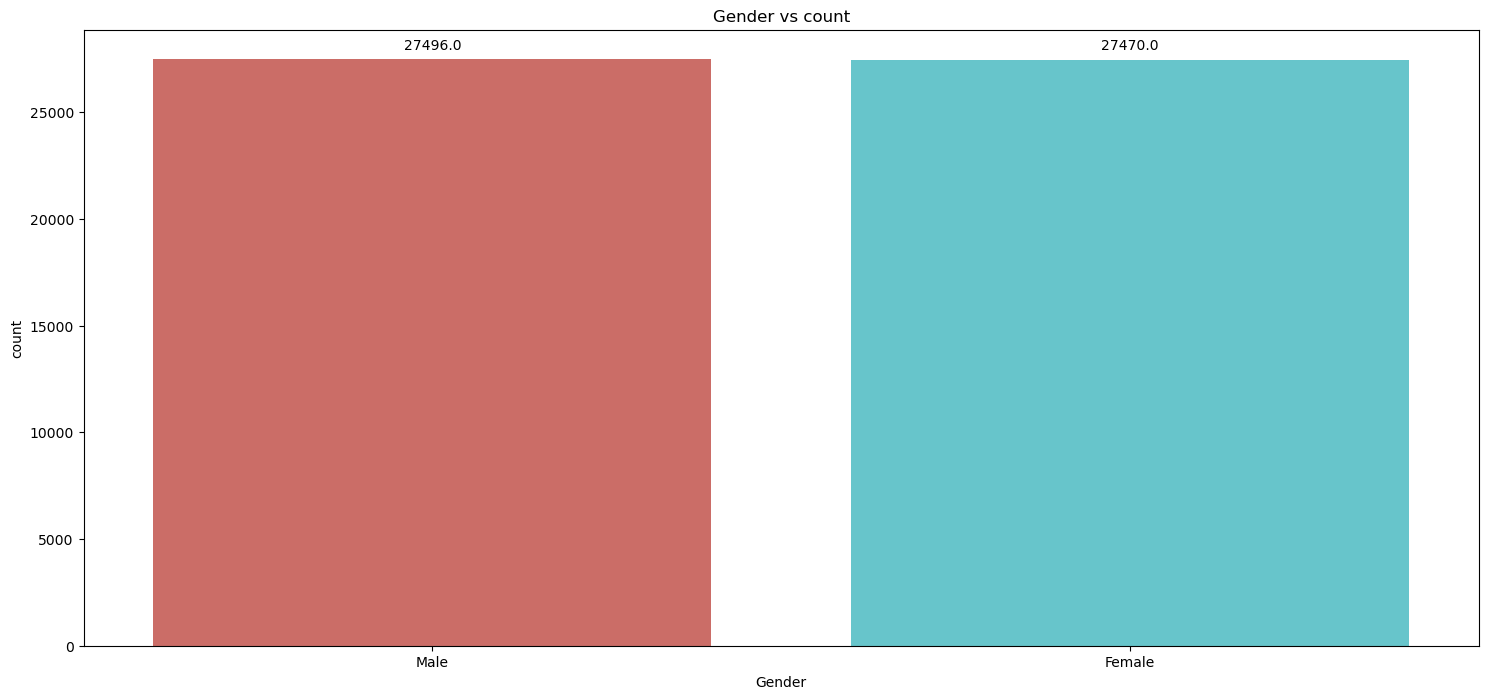

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




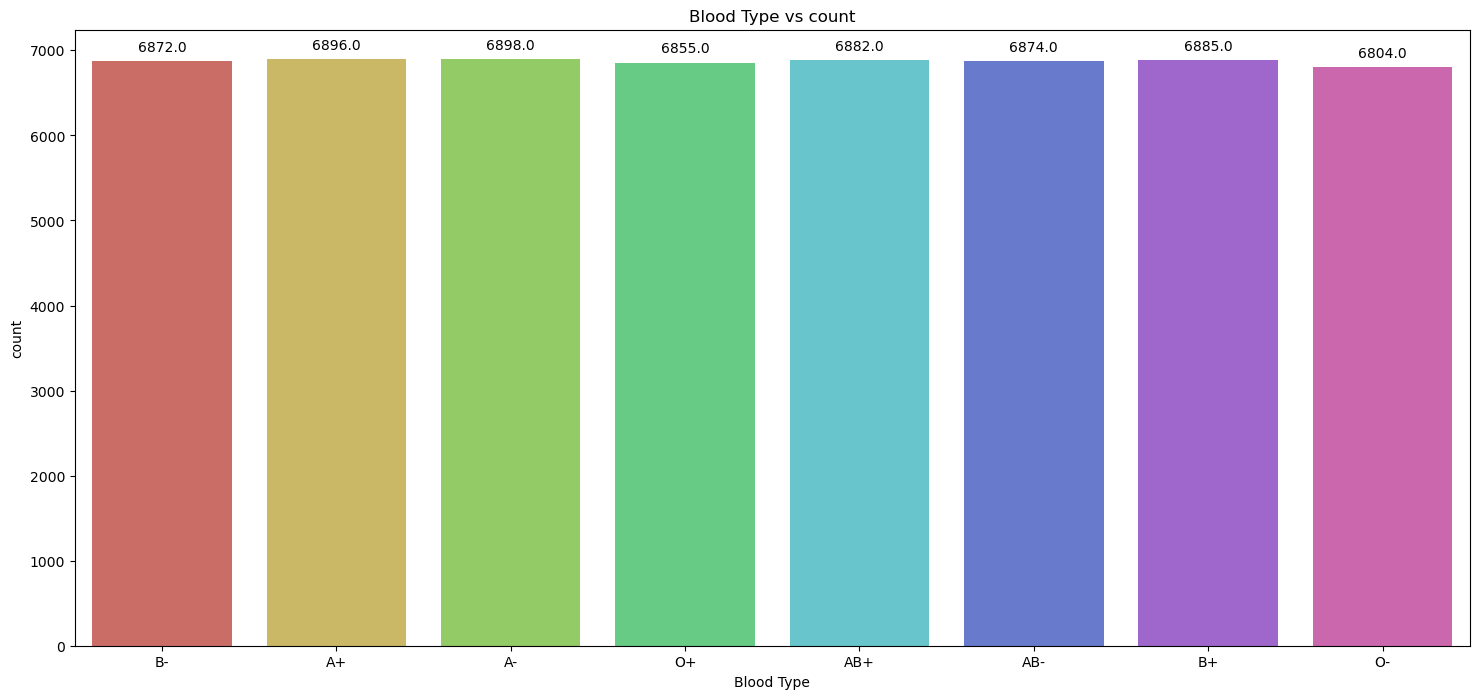

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




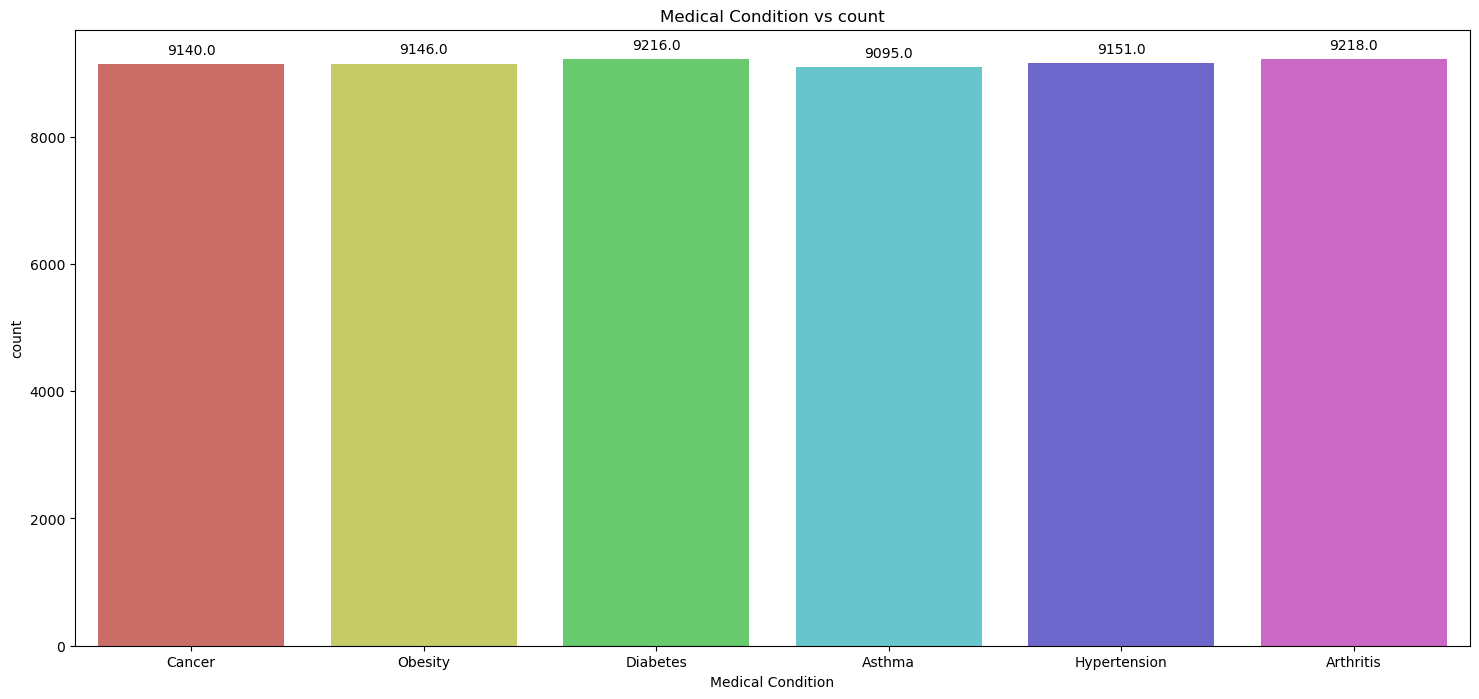

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




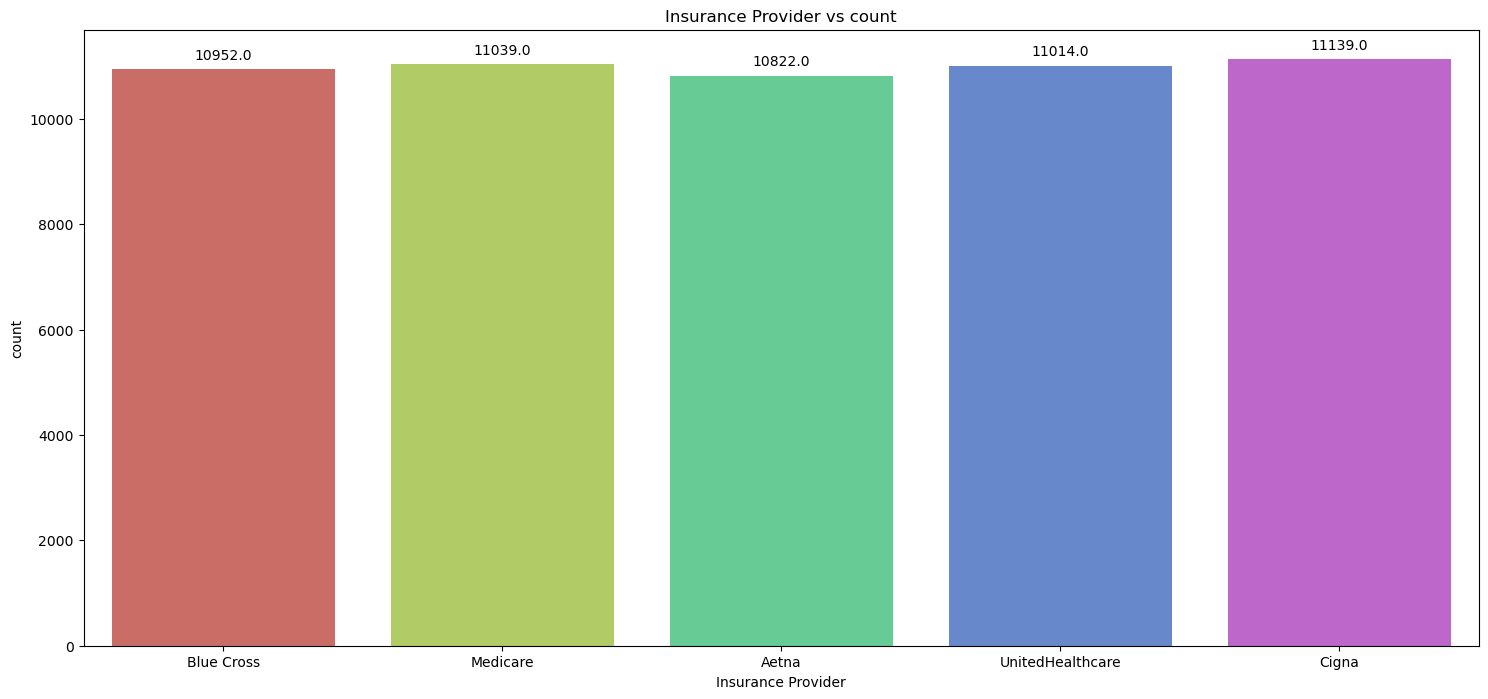

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




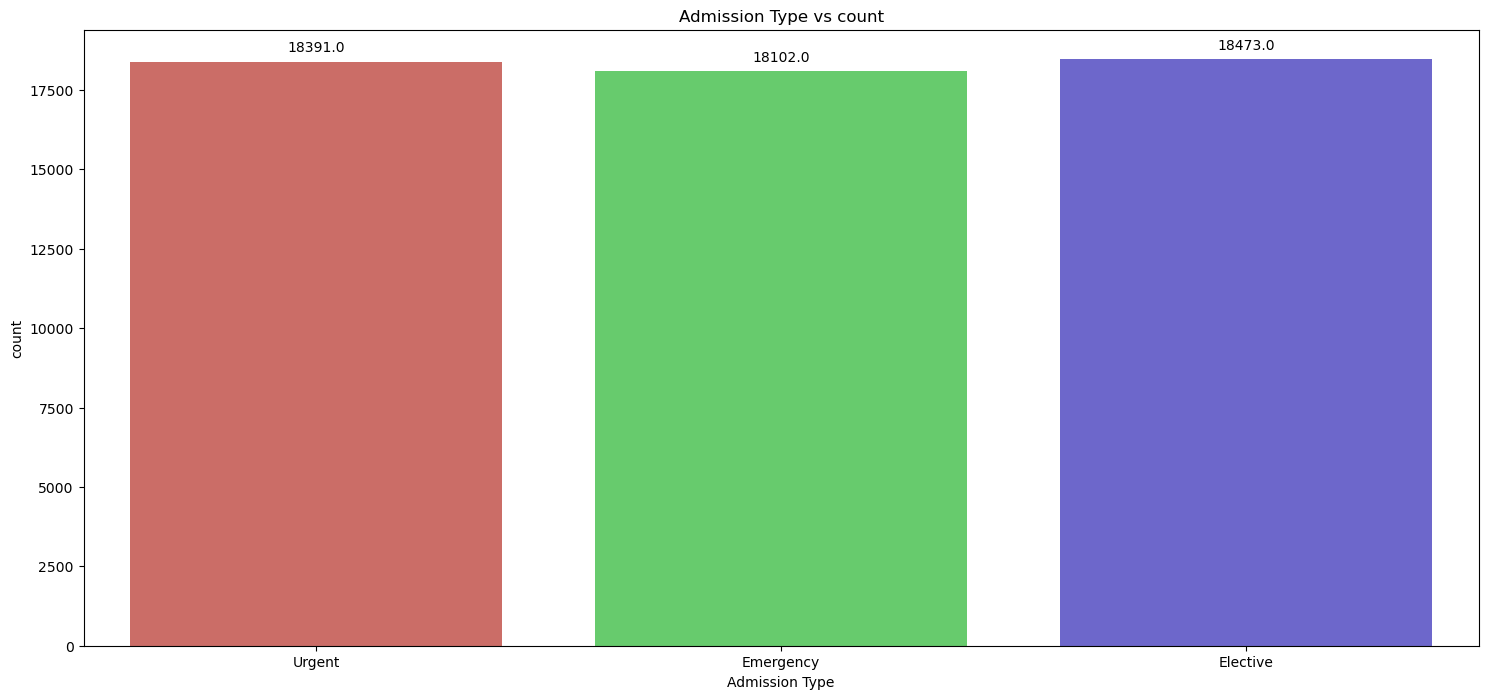

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




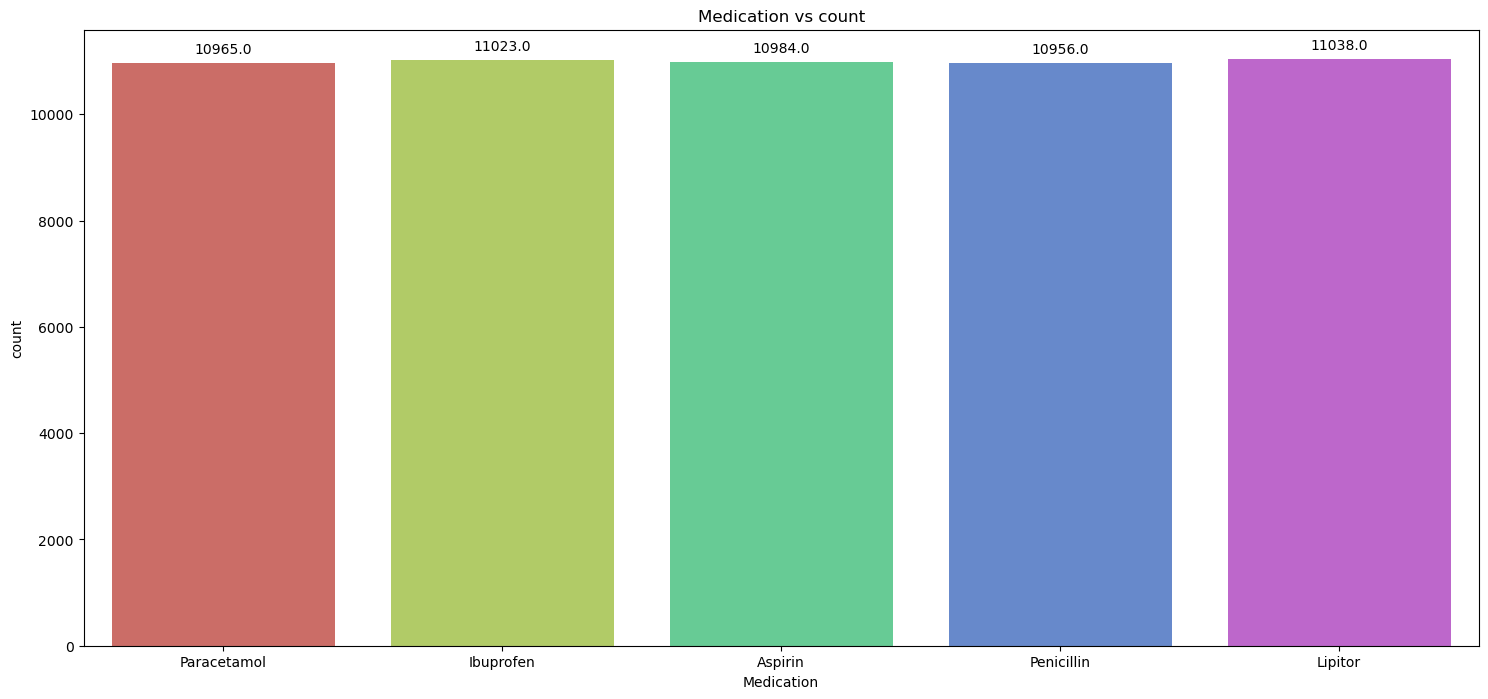

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\681727764.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




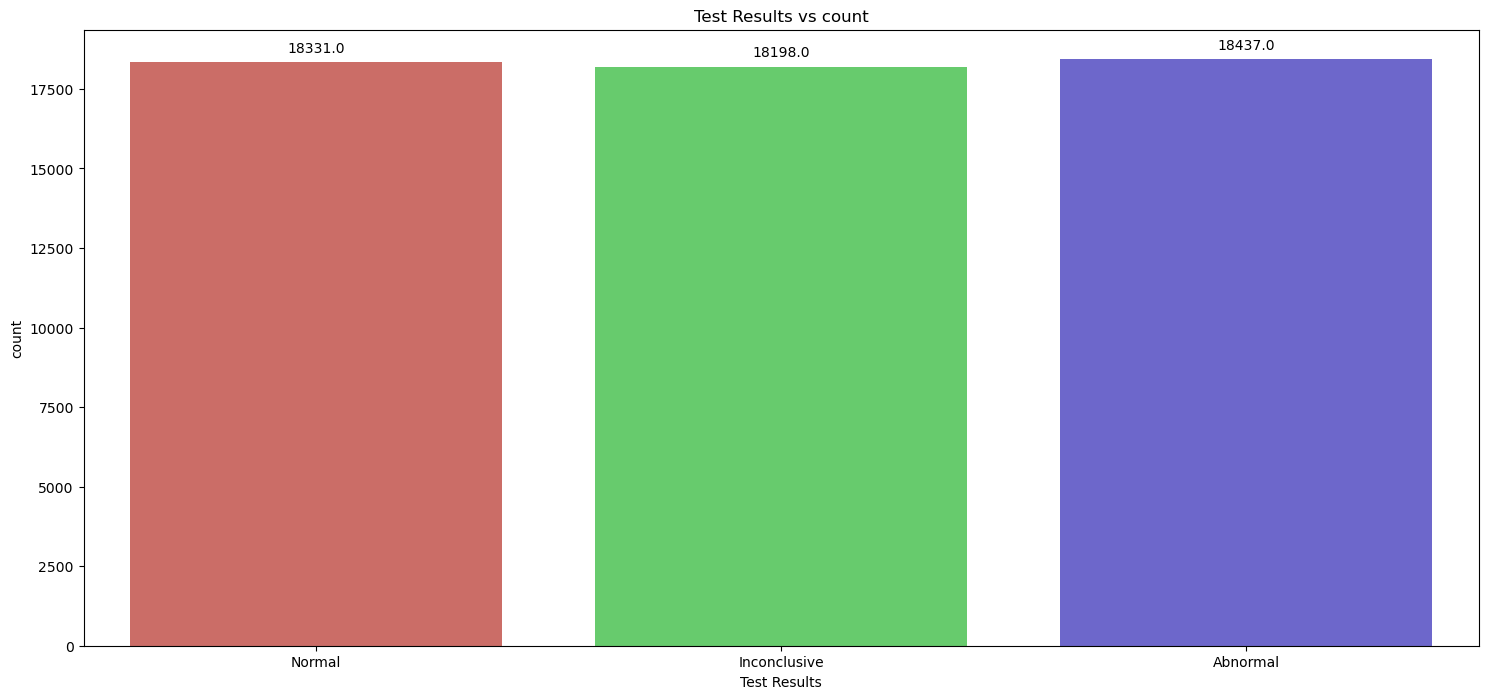

In [435]:
for i in categorical_features:
    plt.figure(figsize = (18,8))
    ax= sns.countplot(x= i,data=df, palette = 'hls')
    plt.title(f'{i} vs count')
    for p in ax.patches:
        height  = p.get_height()
        ax.annotate(f'{height}' ,xy= (p.get_x()+ p.get_width()/2.,height),xytext=(0,10),textcoords='offset points',ha = 'center',va = 'center')
    plt.show()

In [436]:
import plotly.express as px
for i in categorical_features:
    fig = px.pie(df[i].value_counts(),values = df[i].value_counts().values,names = df[i].value_counts().index,title = f'Distribution of {i}')
    fig.show()

In [437]:
continuous_features

['Age', 'Billing Amount', 'Room Number']

In [438]:
for i in continuous_features:
    print(i)
    print(df[i].unique())
    print('********************************************************************')

Age
[30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]
********************************************************************
Billing Amount
[18856.28131  33643.32729  27955.09608  ...  8441.147064 34934.28411
  8926.285937]
********************************************************************
Room Number
[328 265 205 450 458 389 277 316 249 394 288 134 309 182 465 114 449 260
 115 295 327 119 109 162 401 157 223 293 371 108 245 494 285 228 481 212
 113 272 478 196 418 410 300 211 413 138 456 234 492 180 250 296 330 405
 306 333 244 325 378 468 368 263 489 241 231 377 407 135 131 102 255 422
 320 273 395 152 321 428 482 268 120 318 144 226 459 208 227 402 442 425
 373 290 361 251 440 414 424 307 476 388 326 178 177 302 130 430 133 104
 408 376 331 275 480 233 384 380 310 406 213 427 500 451 485 267 154 466


C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



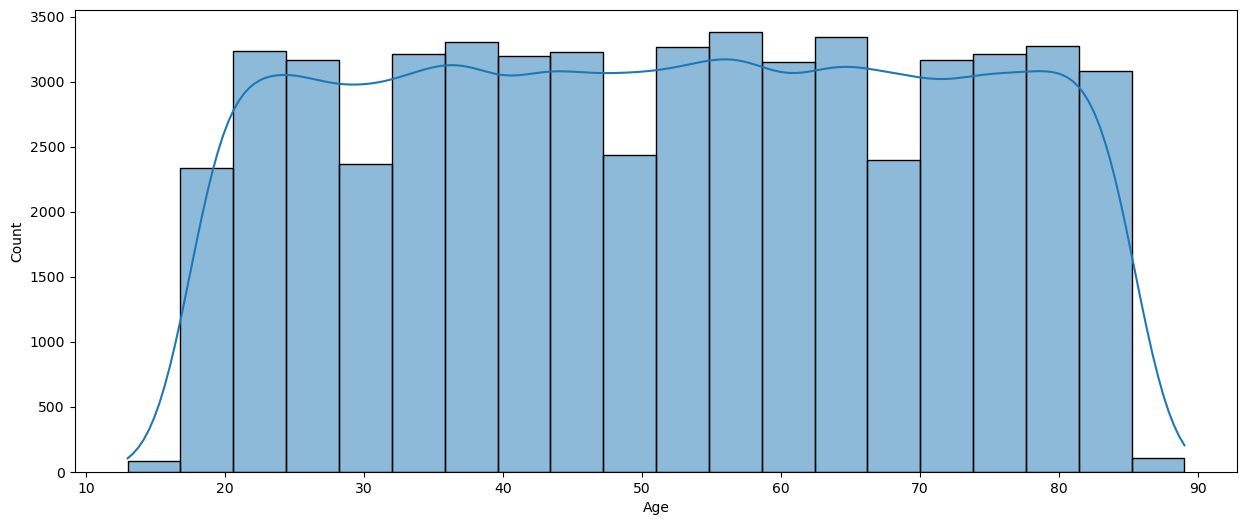

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



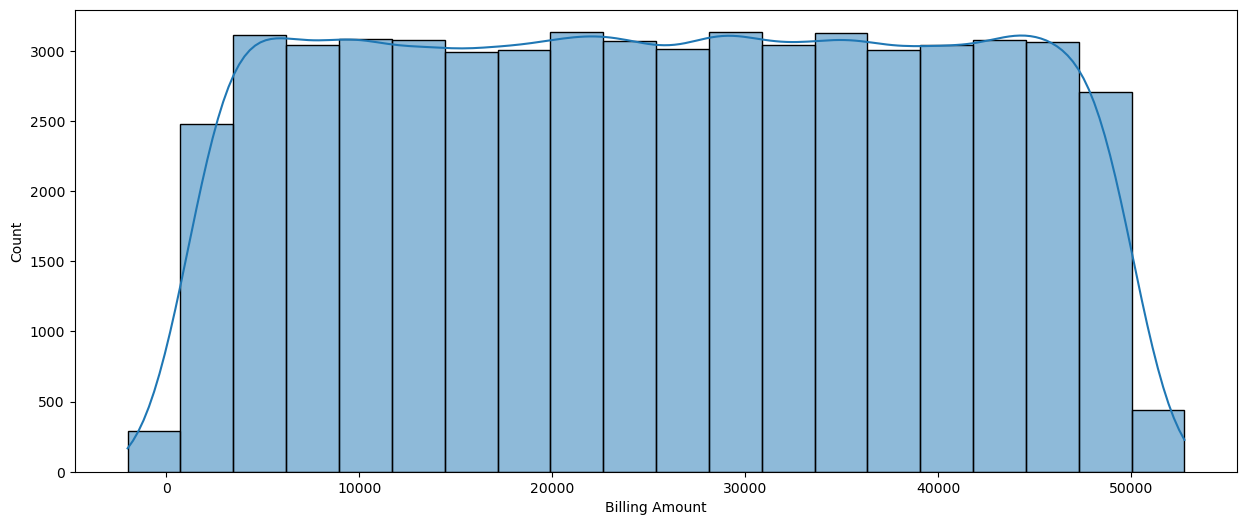

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



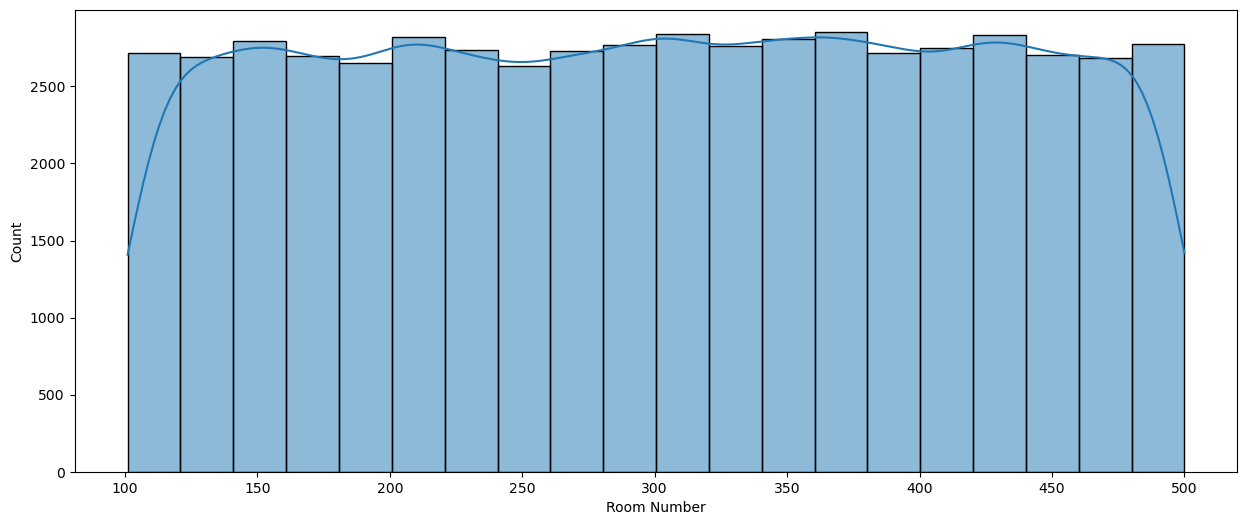

In [439]:
for i in continuous_features:
    plt.figure(figsize = (15,6))
    sns.histplot(df[i], bins = 20 , kde = True, palette = 'hls')
    plt.show()

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




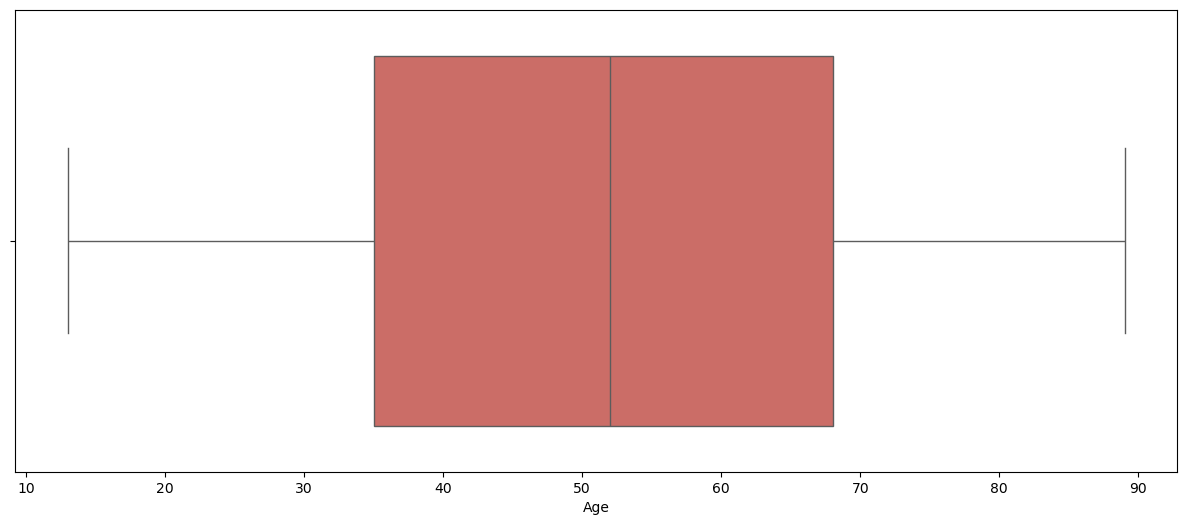

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




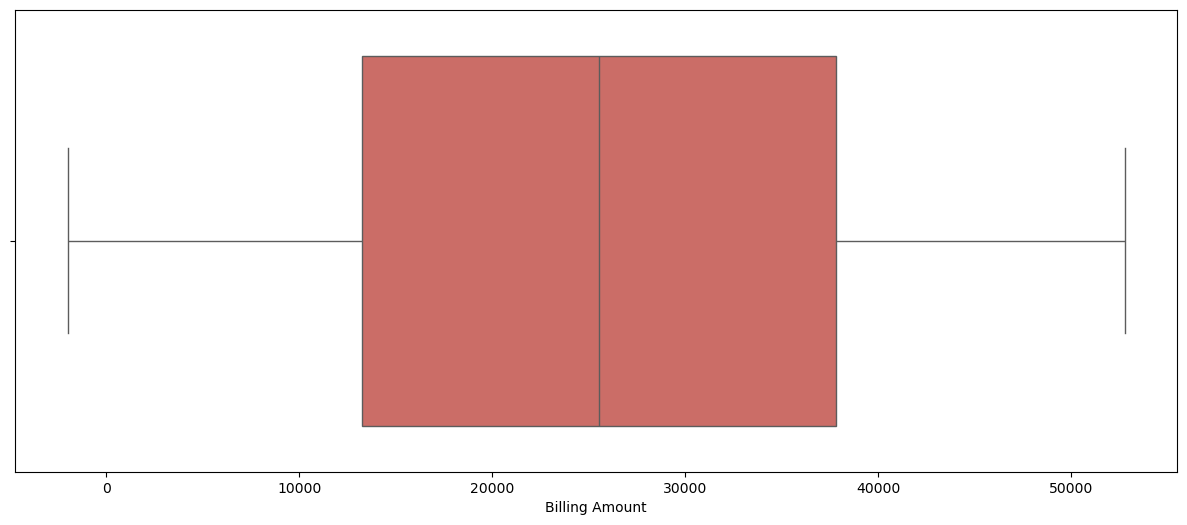

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




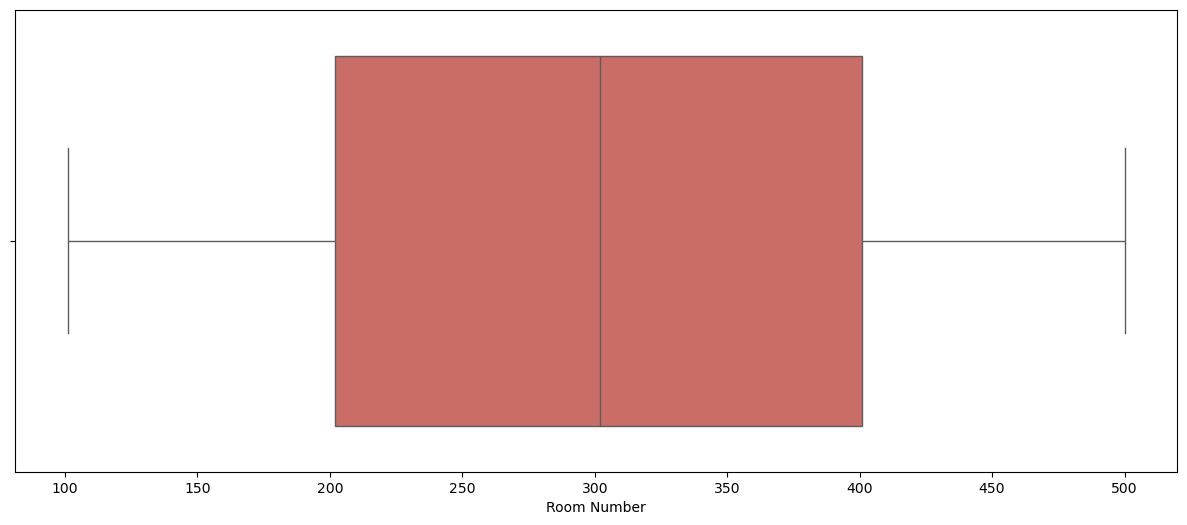

In [440]:
for i in continuous_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = i,data = df, palette='hls')
    plt.show()

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




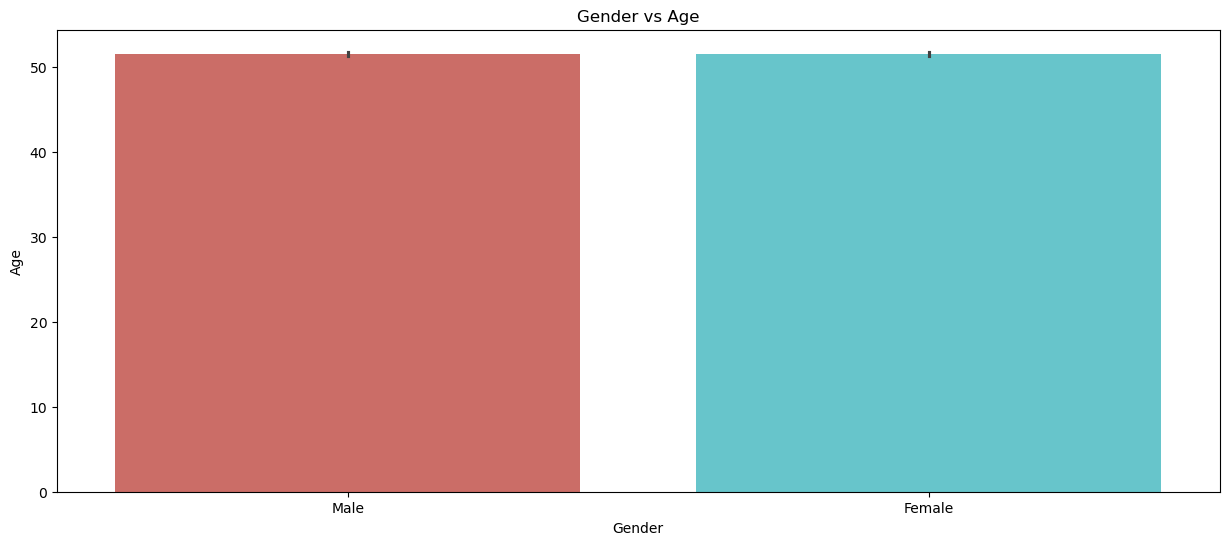

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




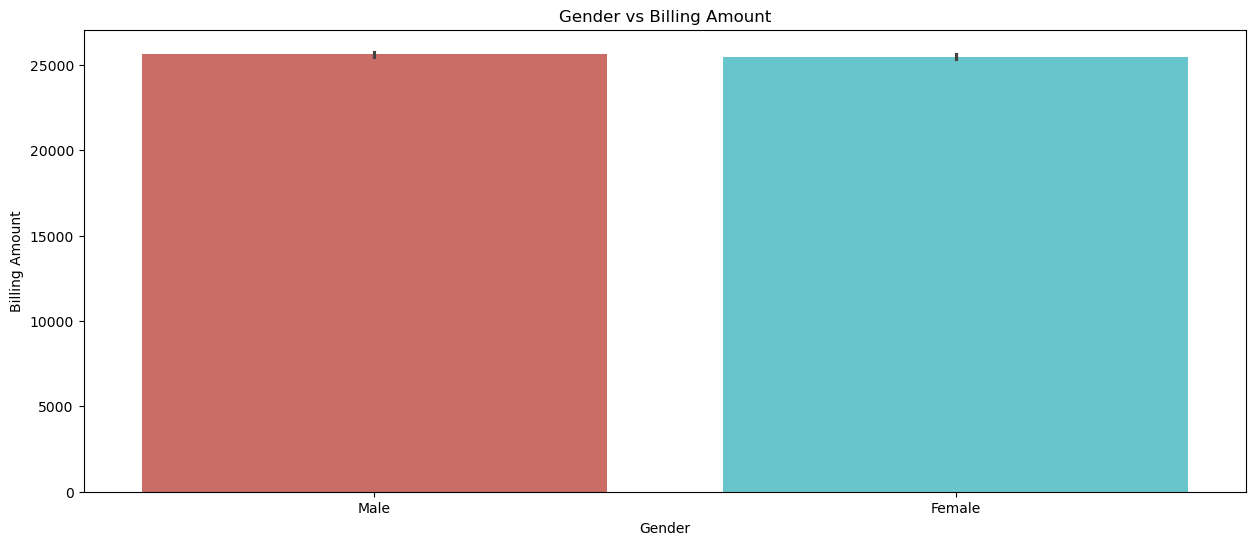

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




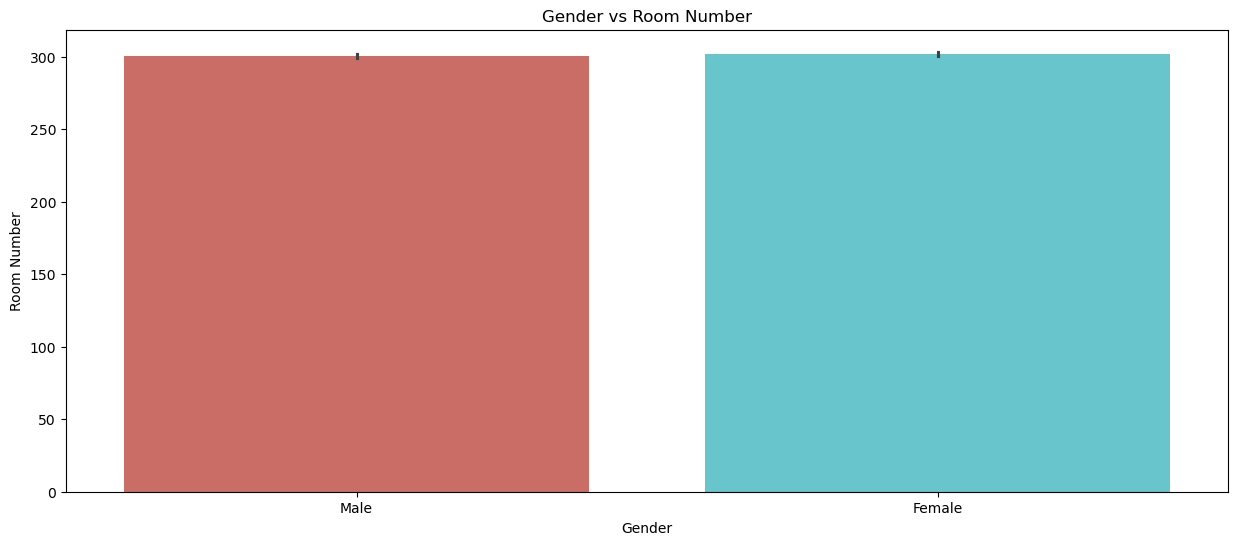

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




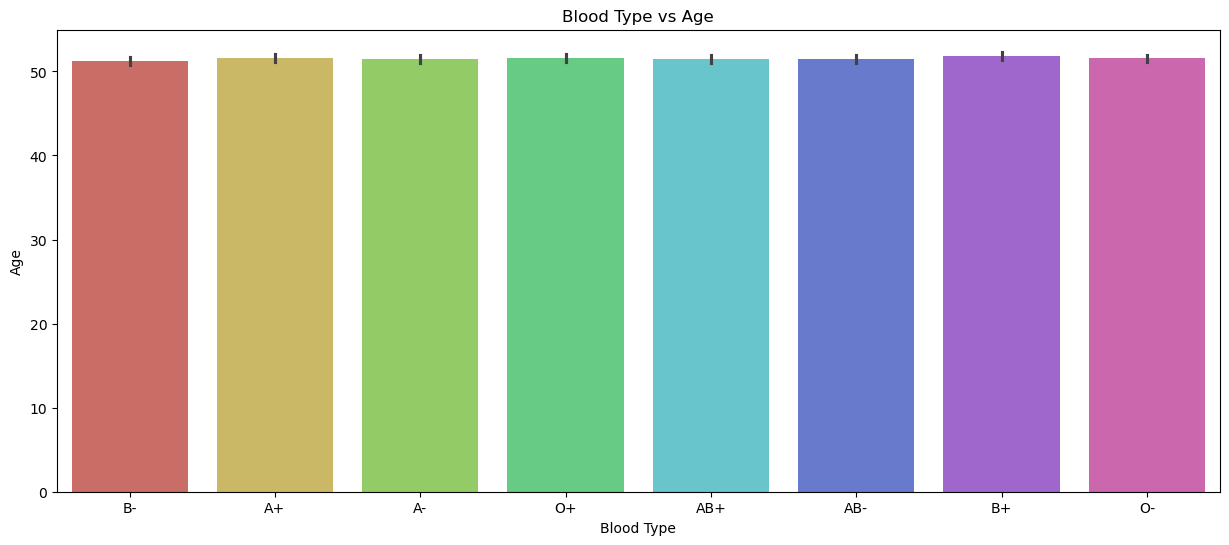

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




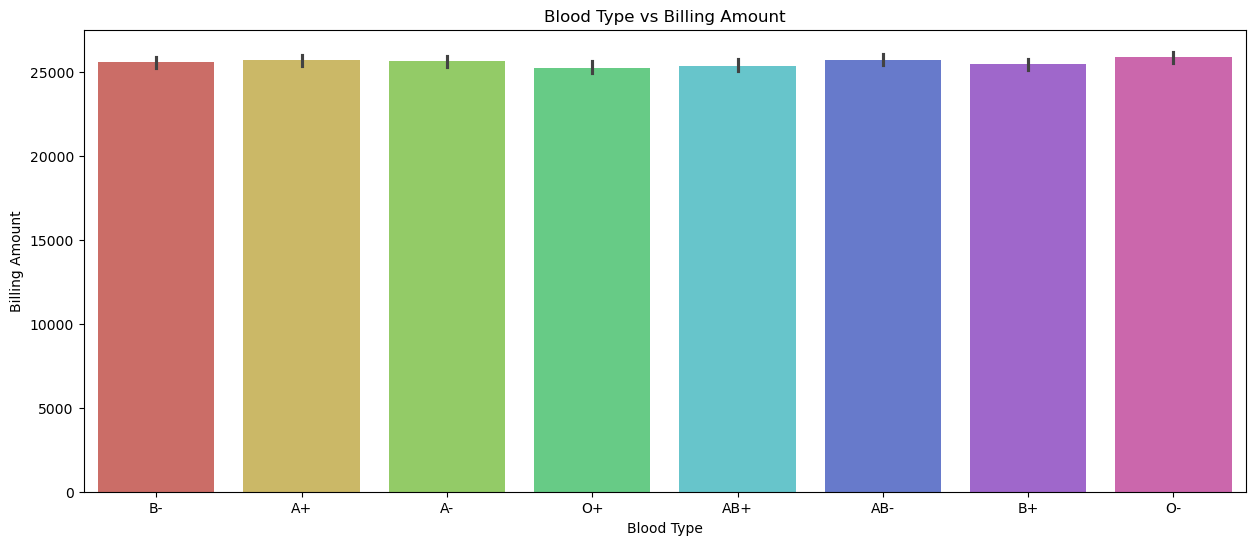

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




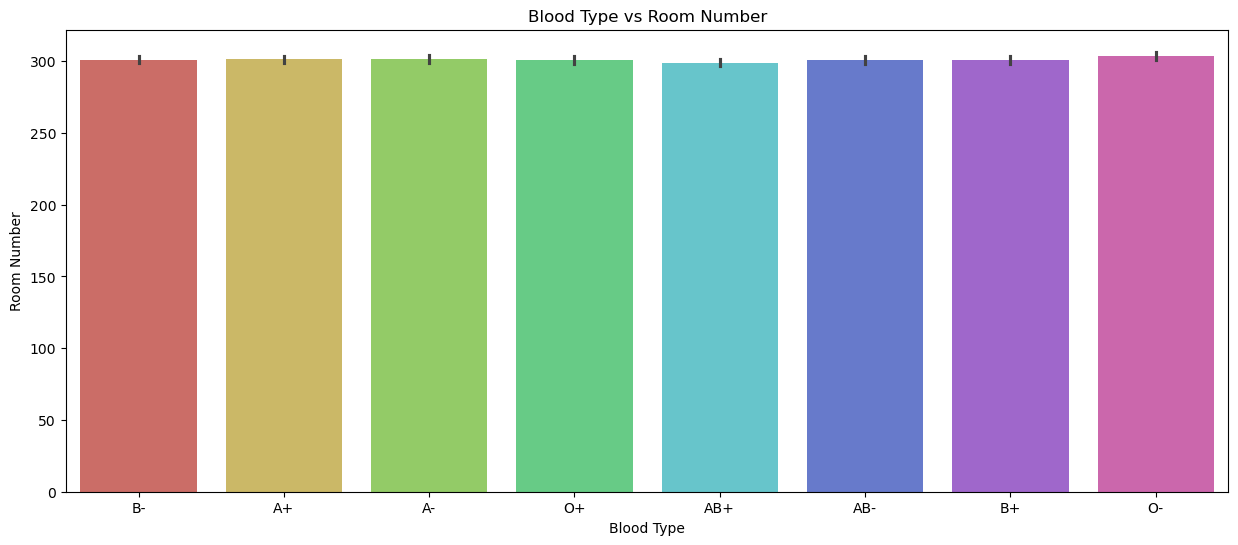

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




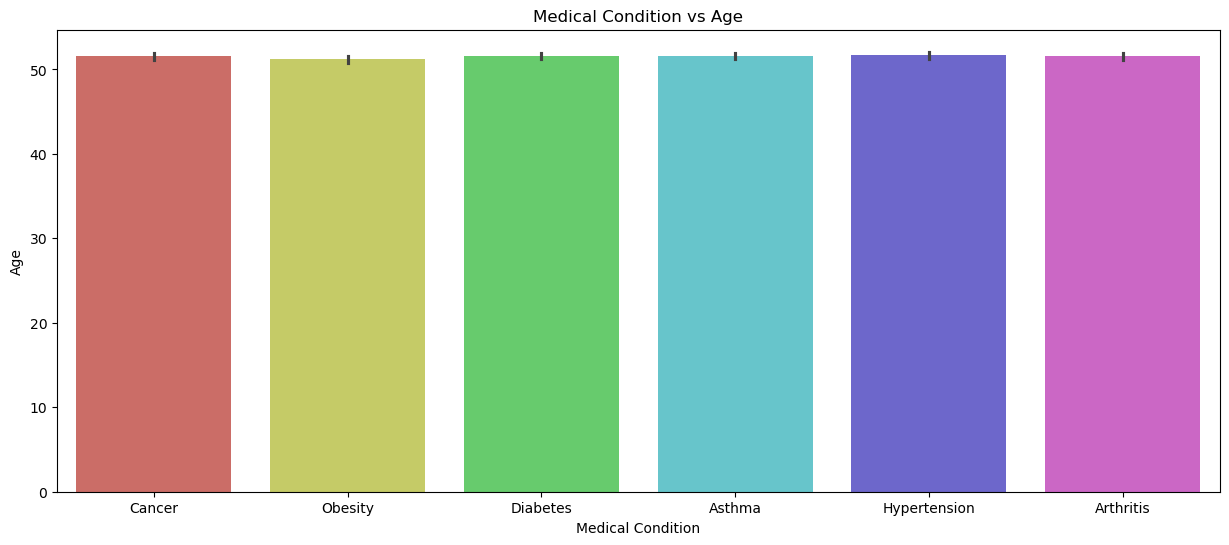

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




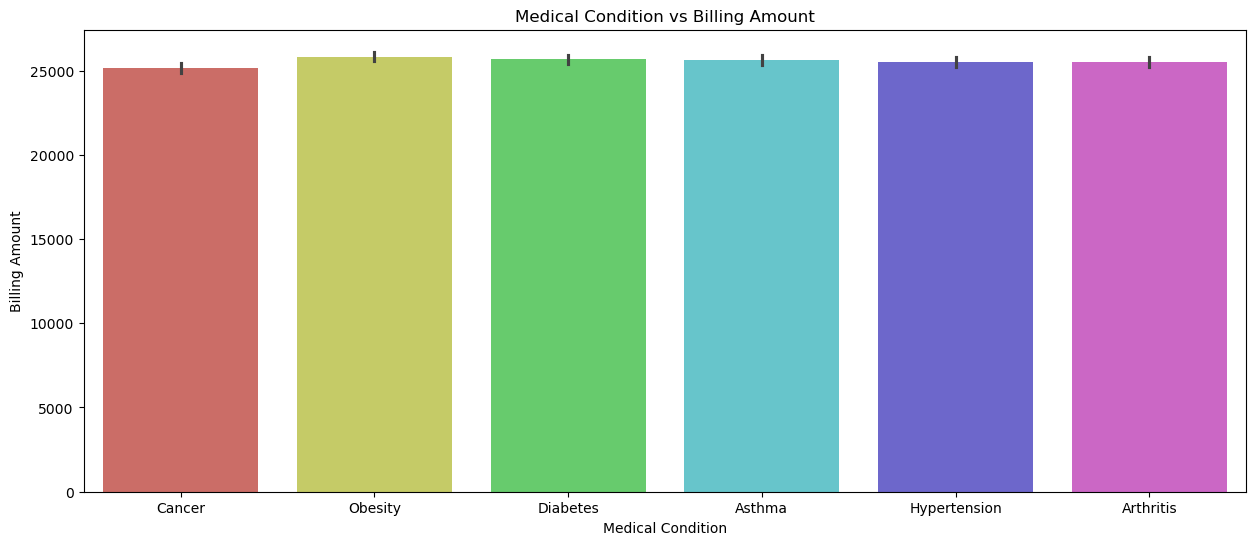

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




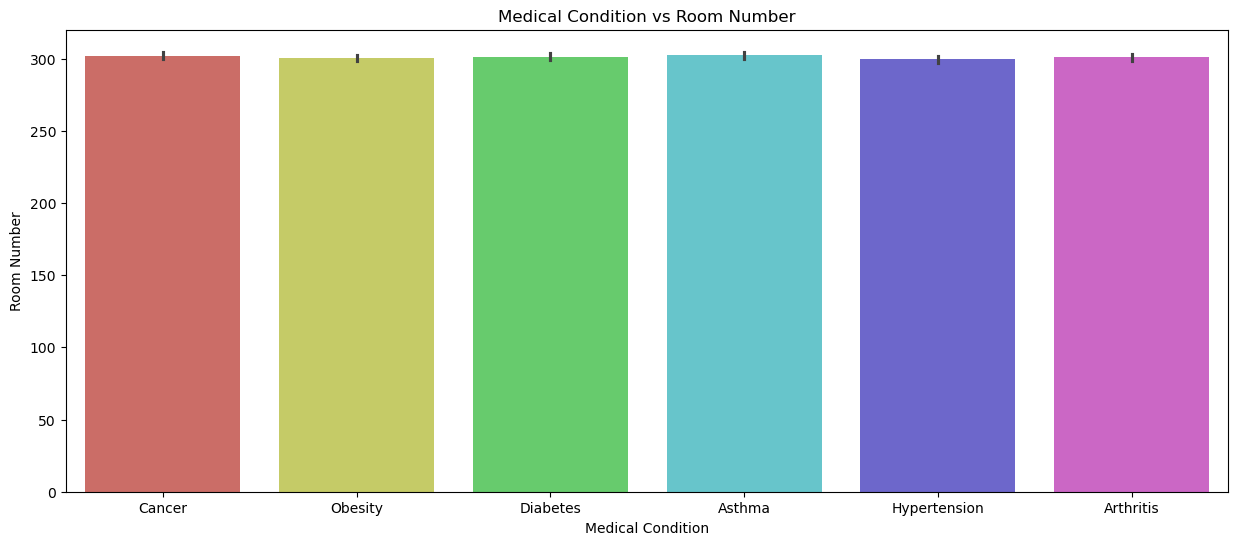

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




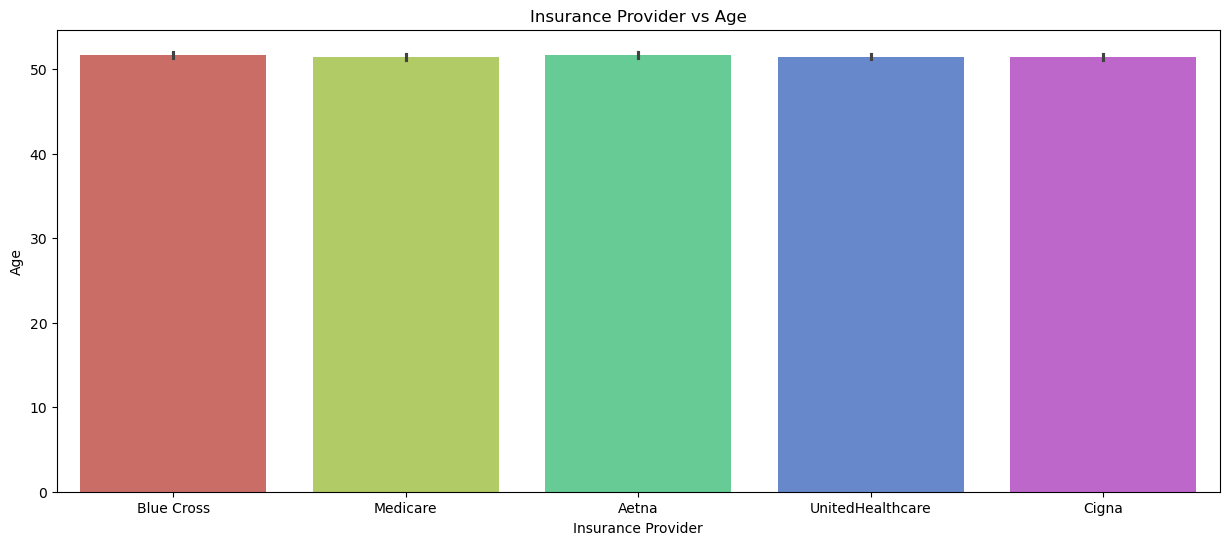

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




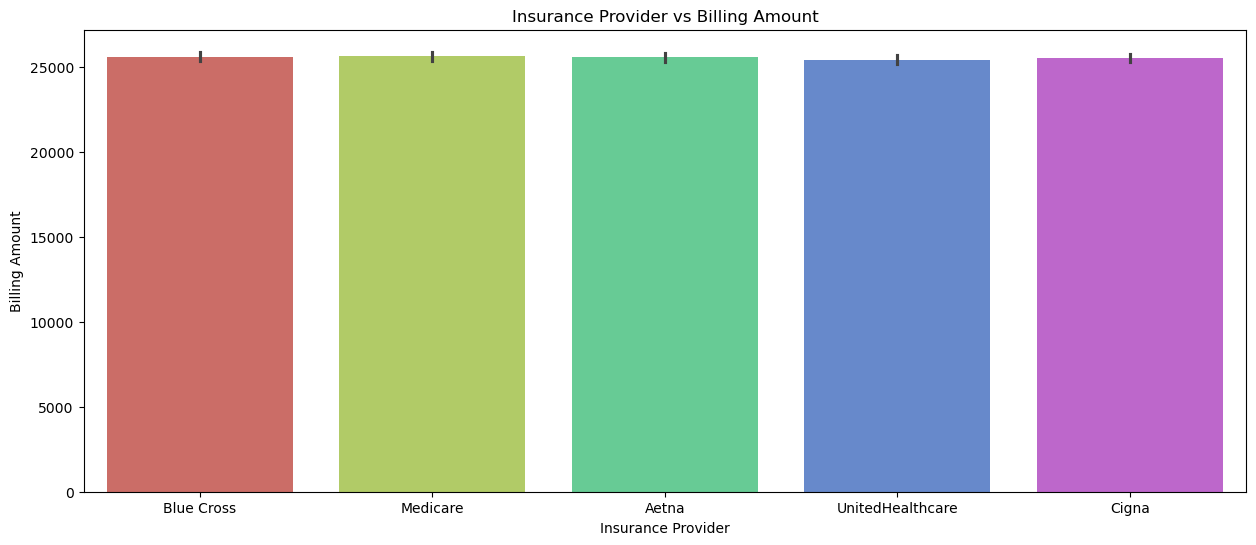

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




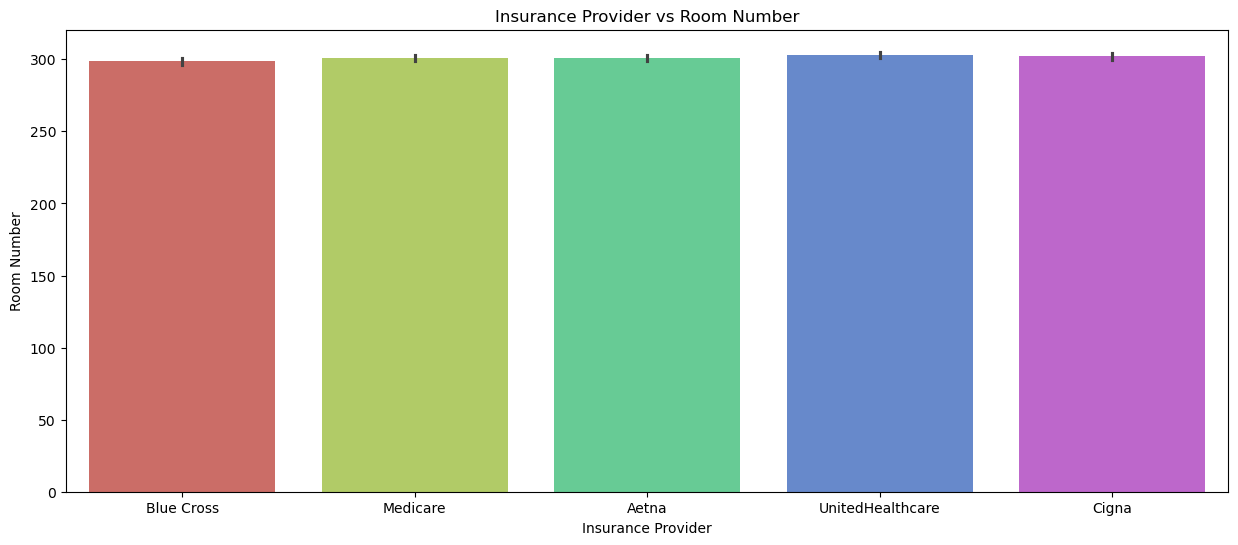

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




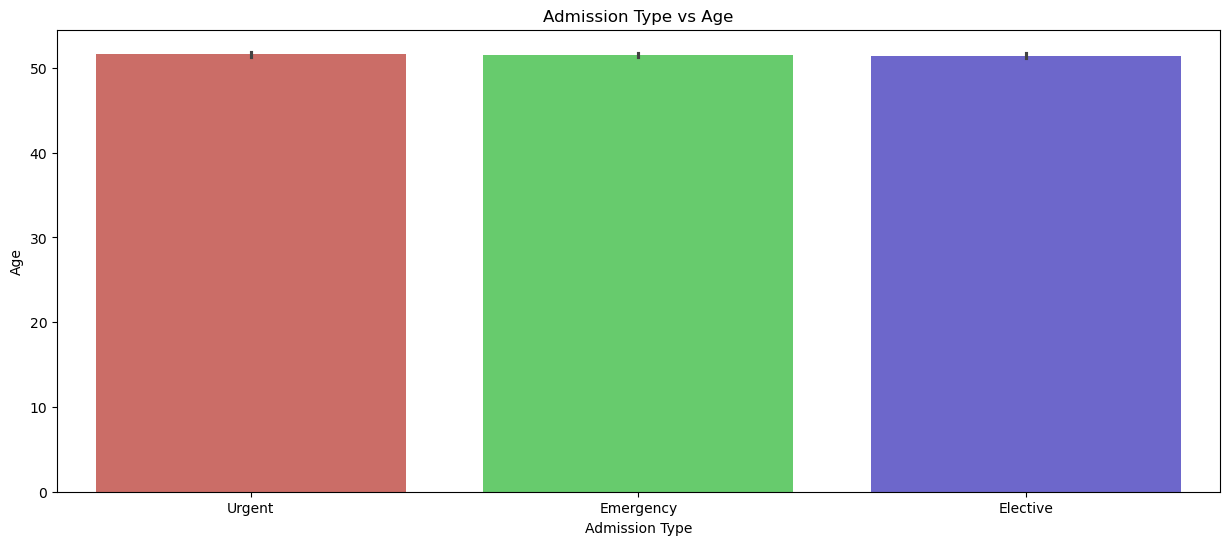

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




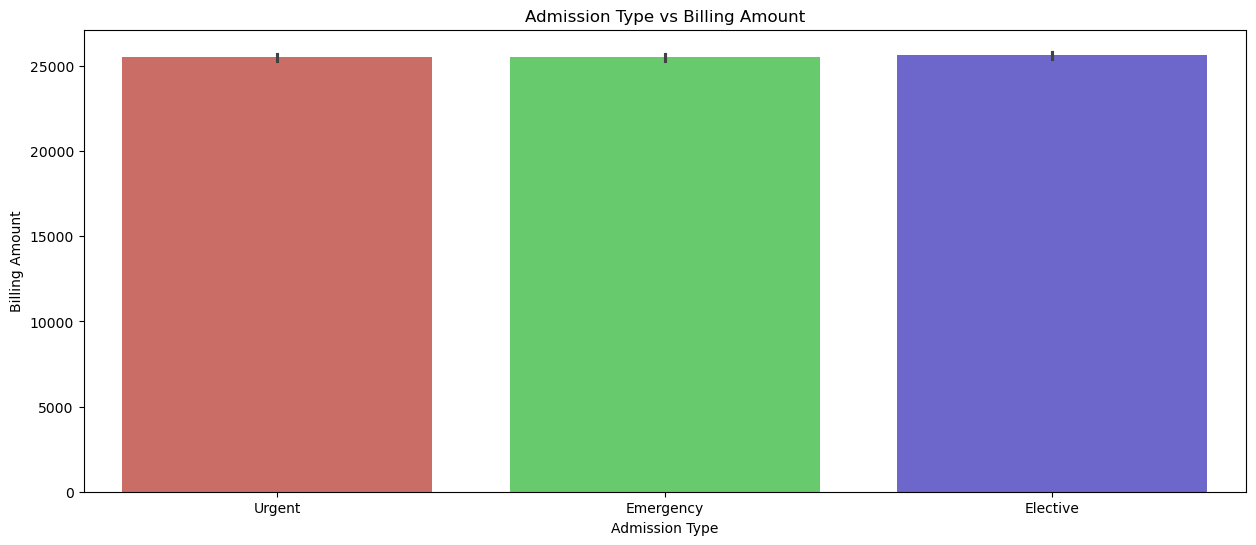

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




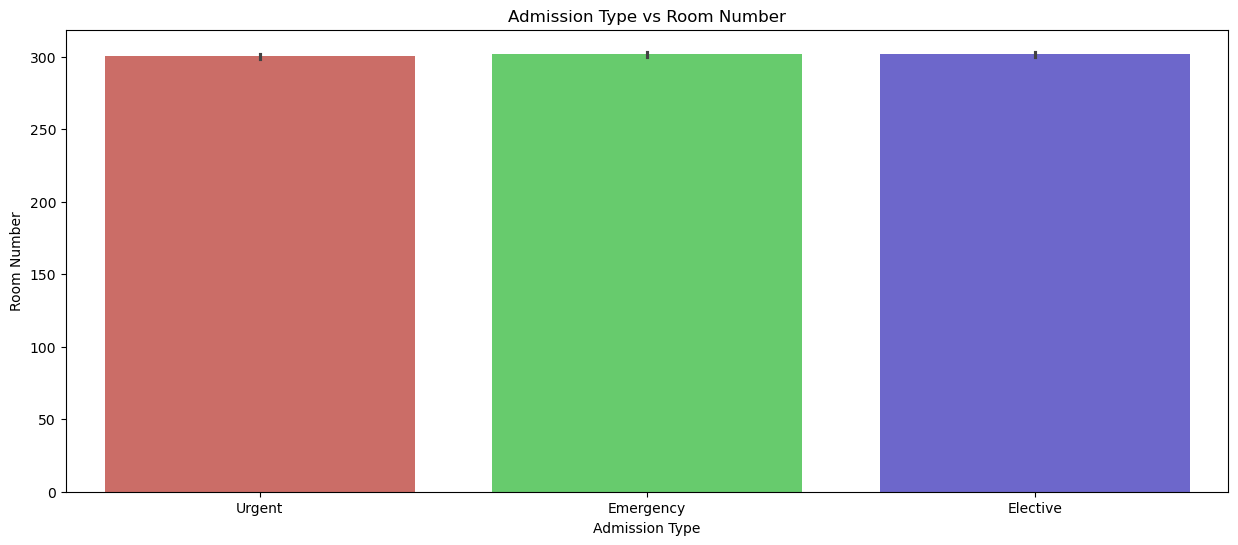

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




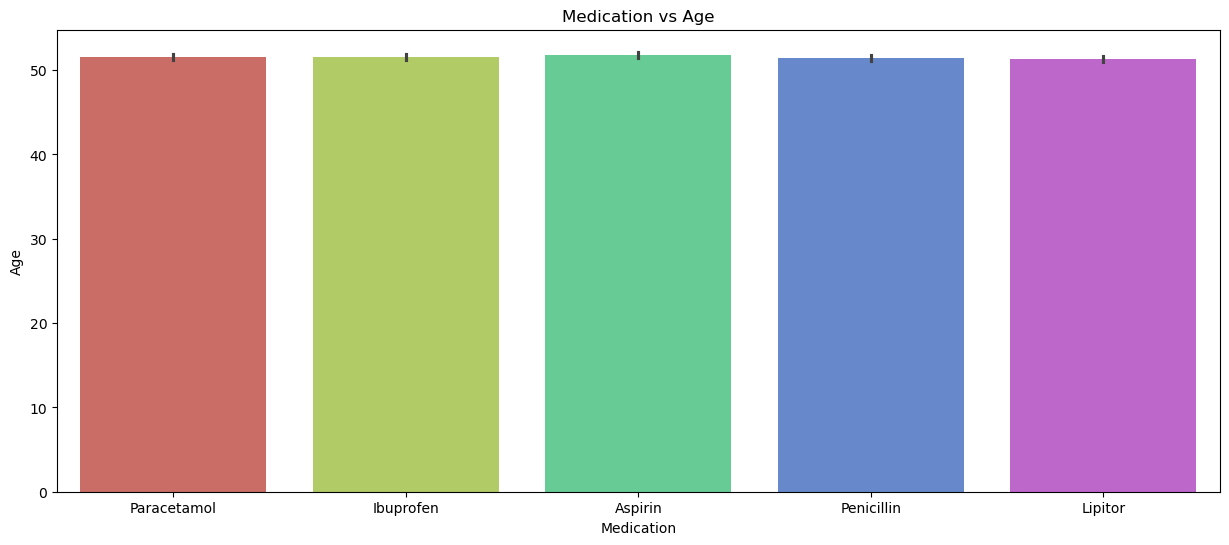

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




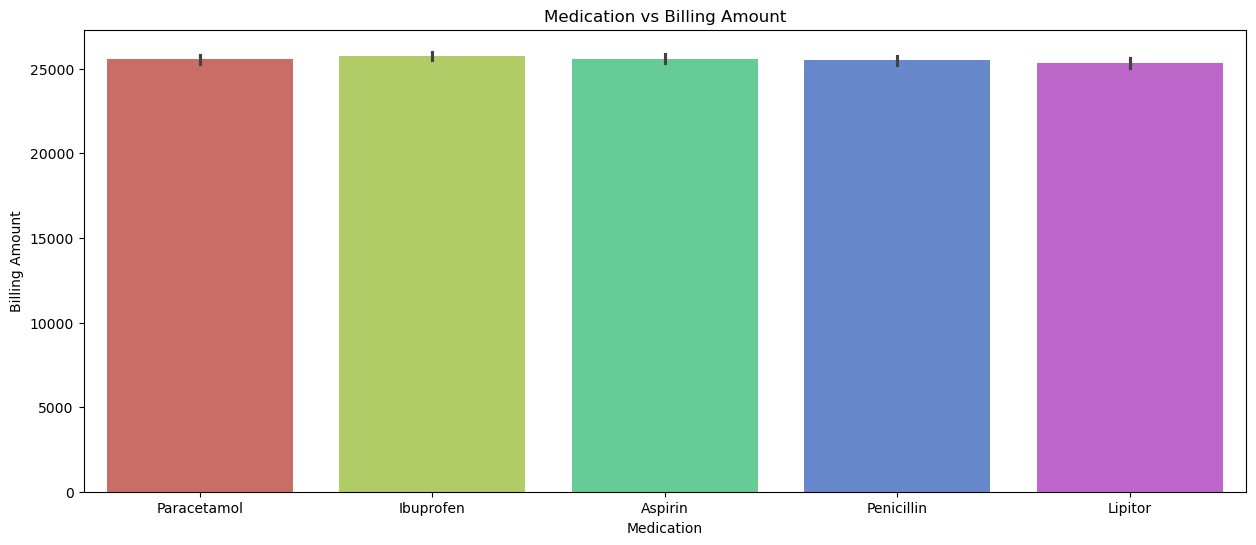

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




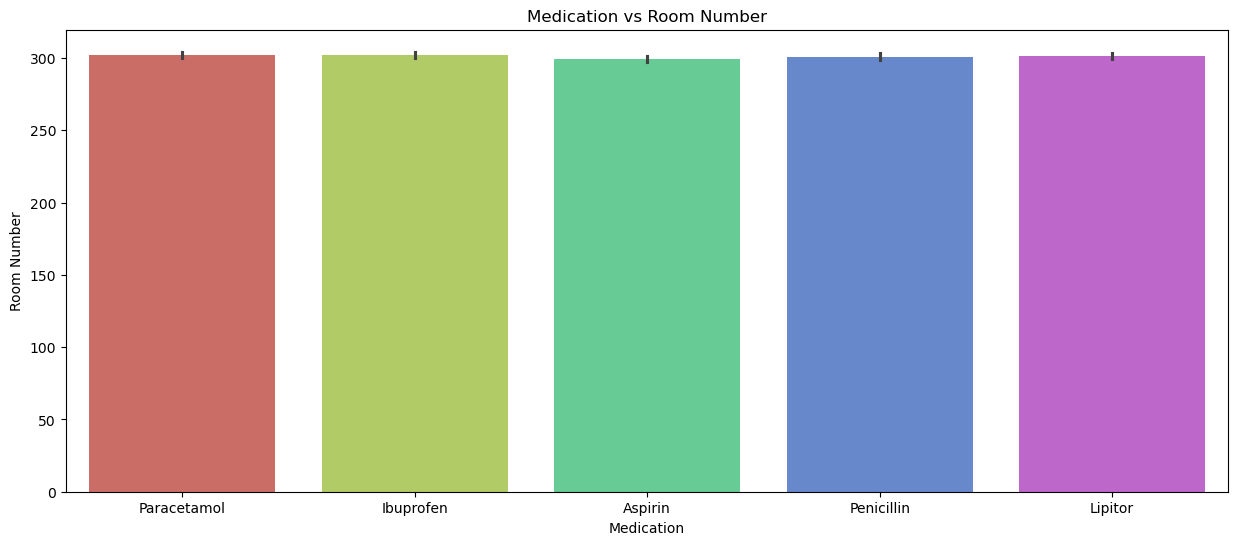

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




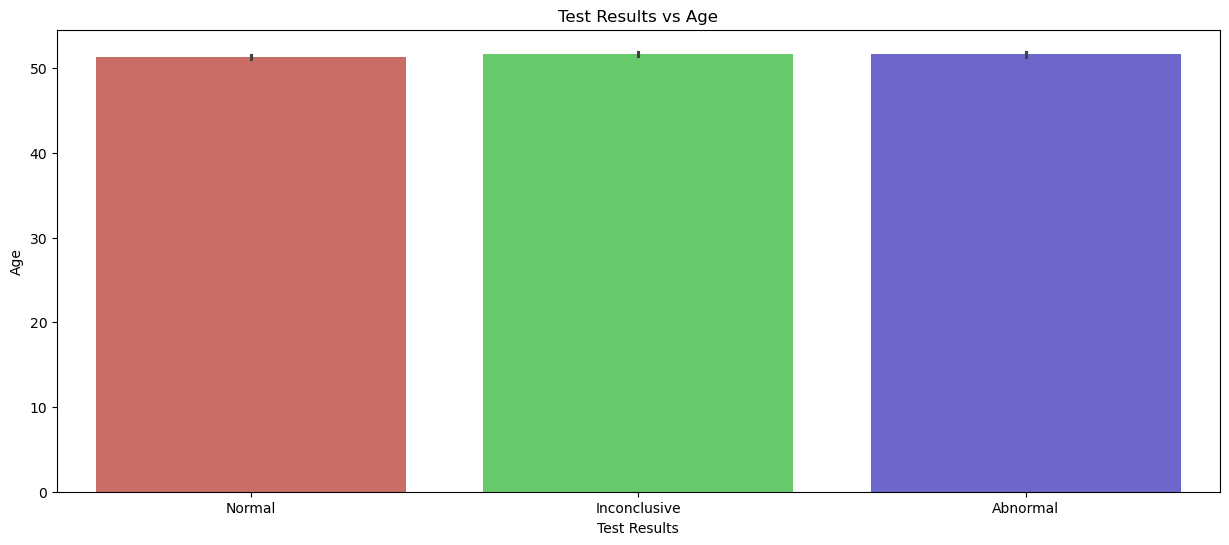

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




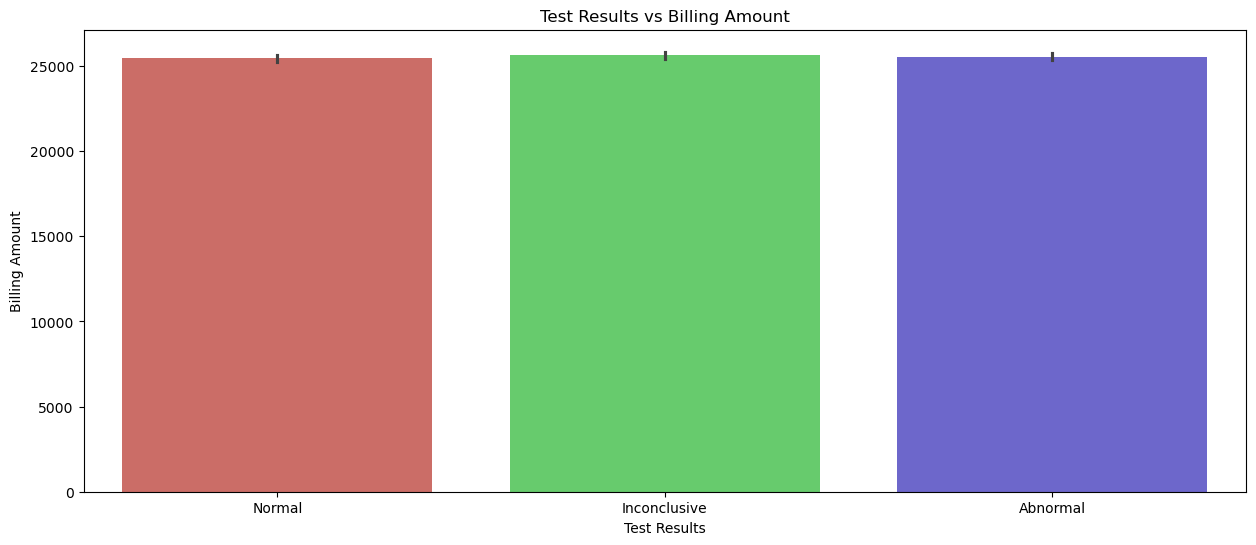

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




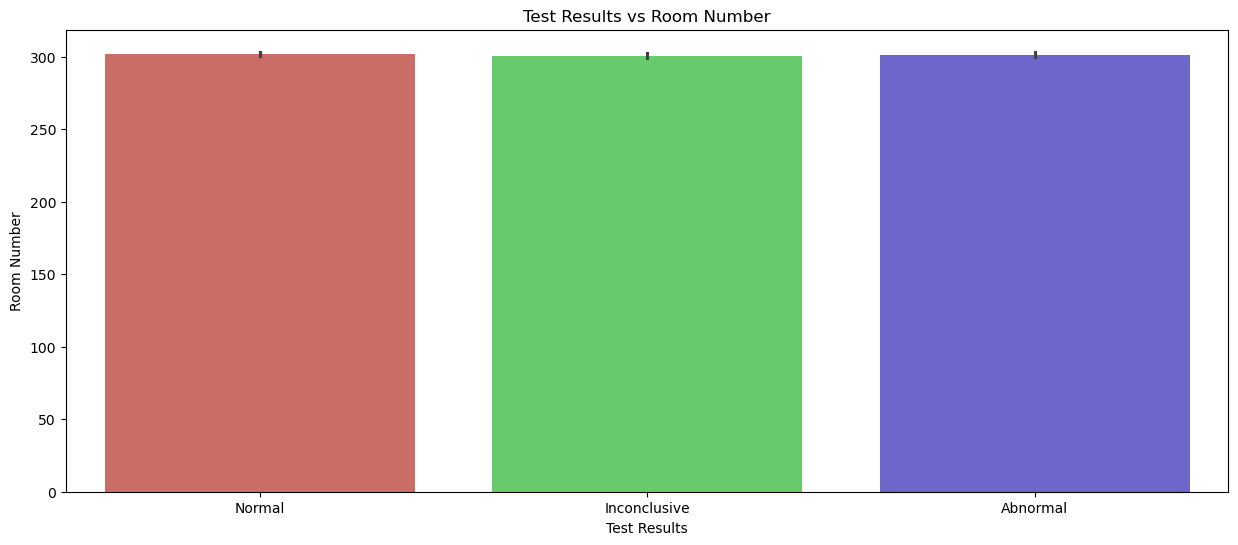

In [441]:
for dis in categorical_features:
    for con in continuous_features:
        plt.figure(figsize = (15,6))
        ax = sns.barplot( data=df,x=dis,y=con,palette='hls')
        plt.title(f'{dis} vs {con}')
        plt.show()

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',xy = (p.get_x() + p.get_width()/2,height),xytext=(0,10), ha="center", va="bottom",fontsize=10, color='black')
            ax.set_ylabel(height)
            plt.show()
    

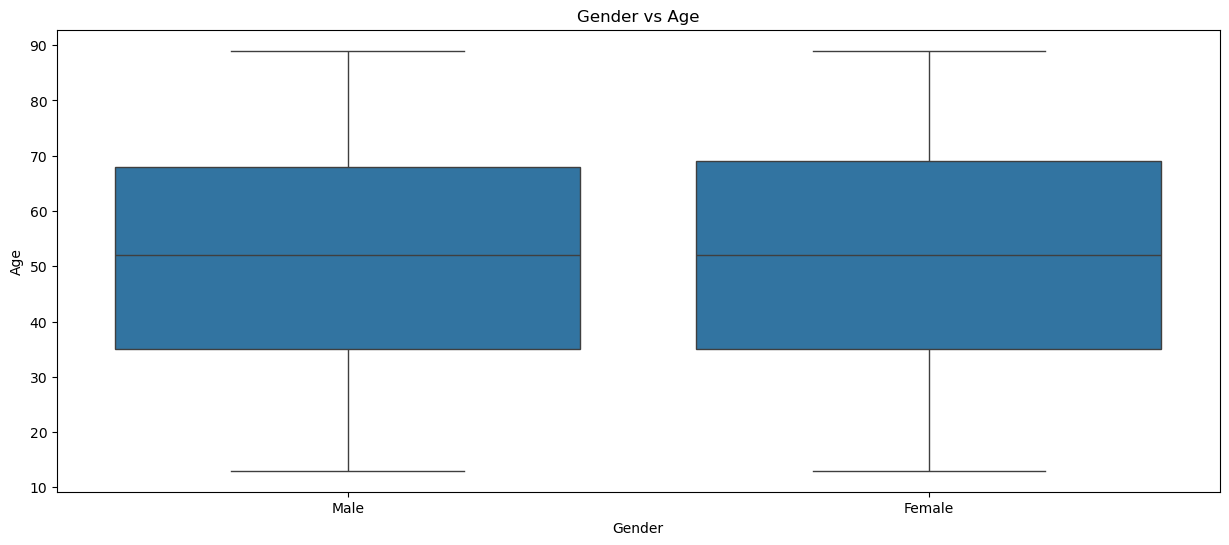

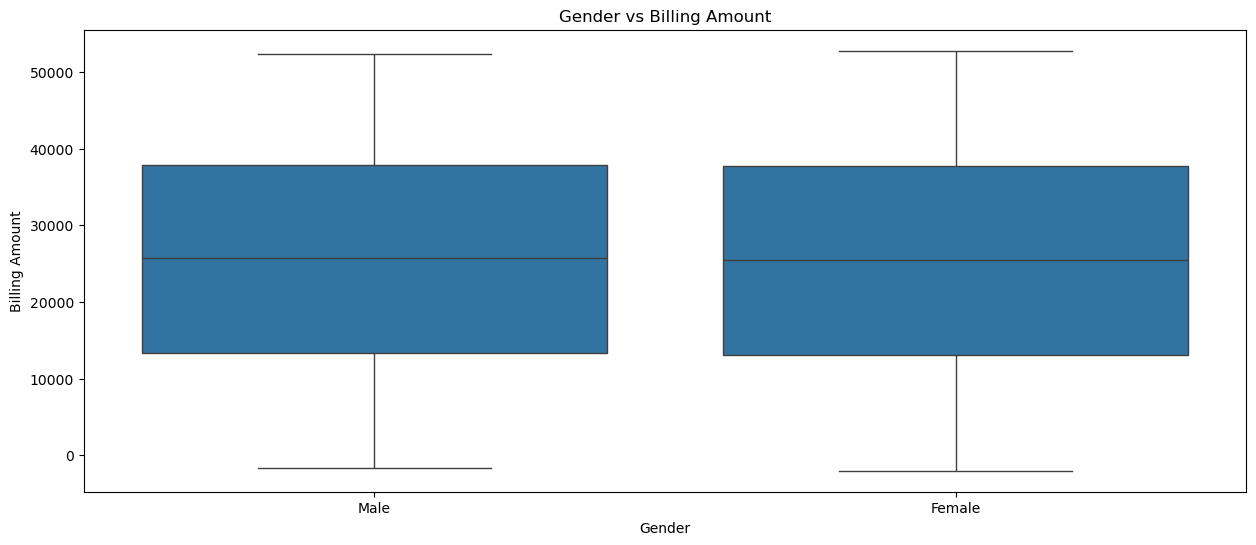

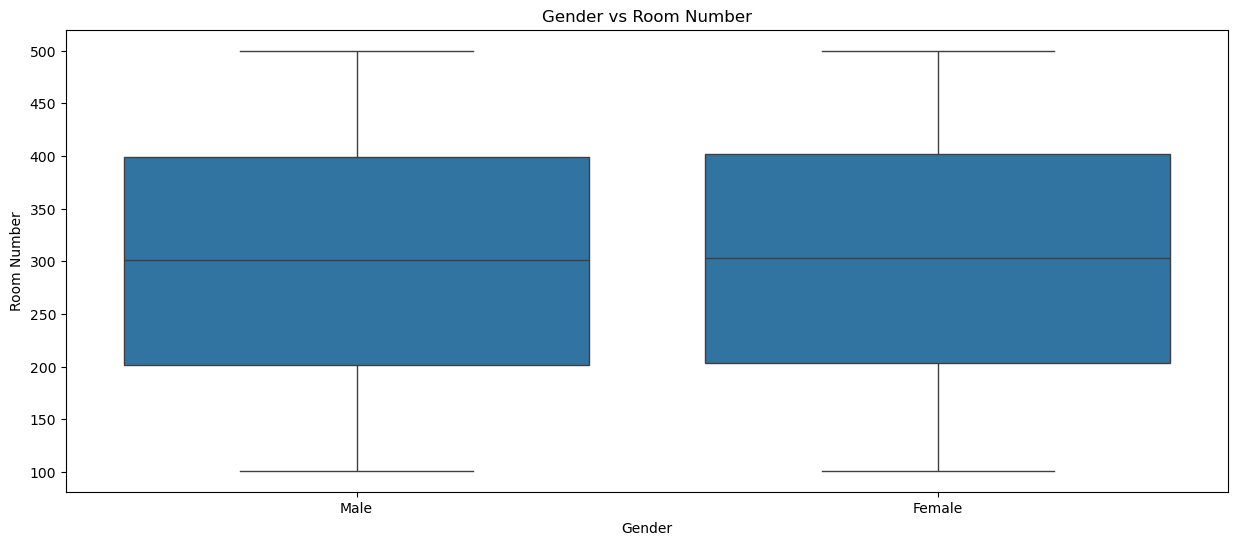

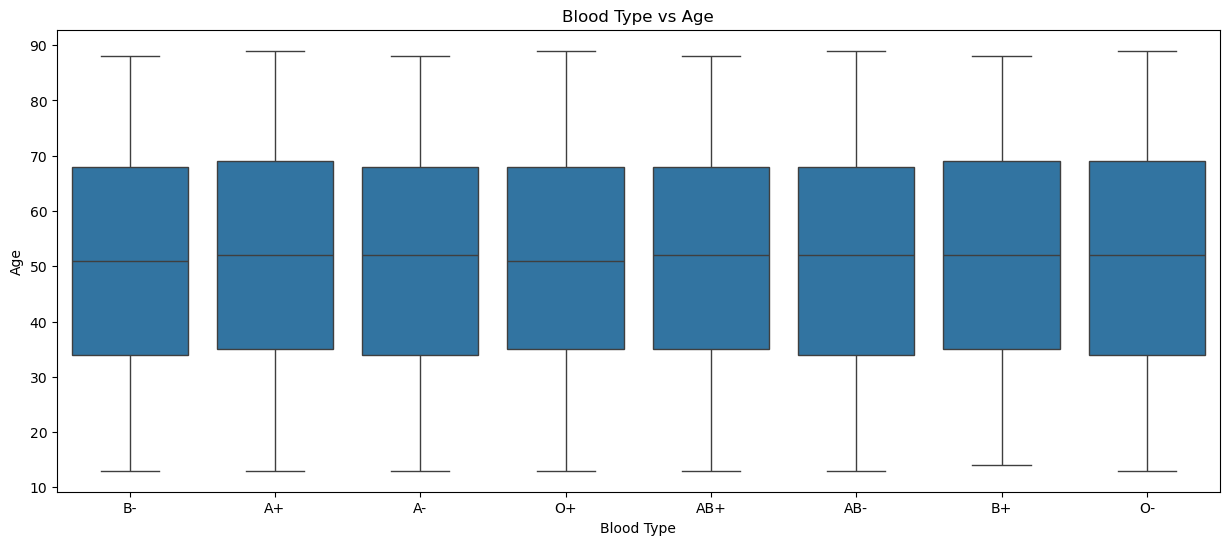

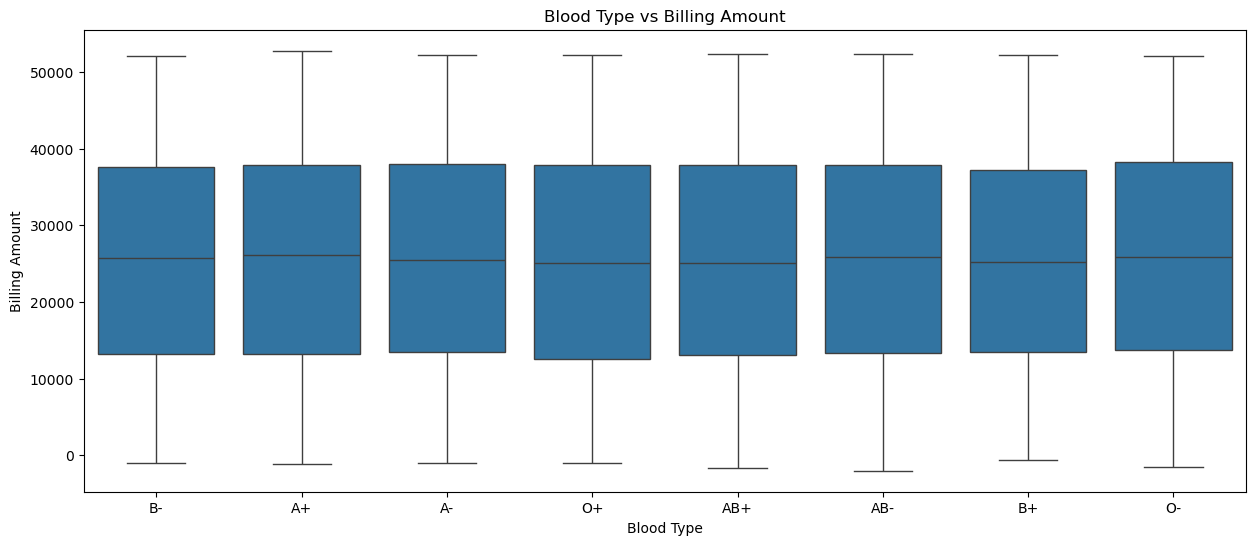

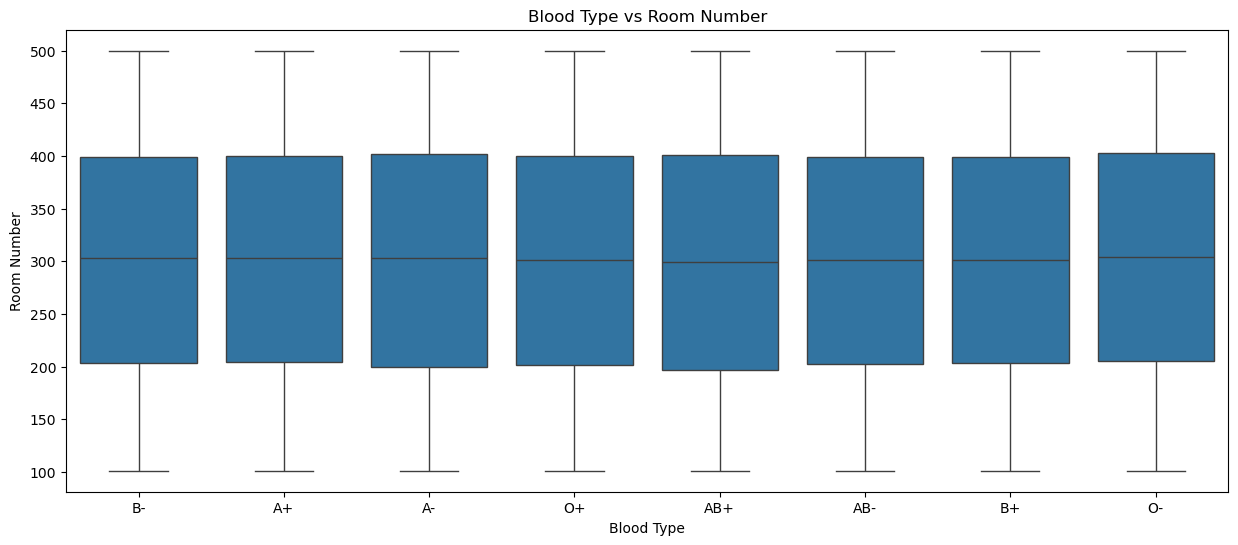

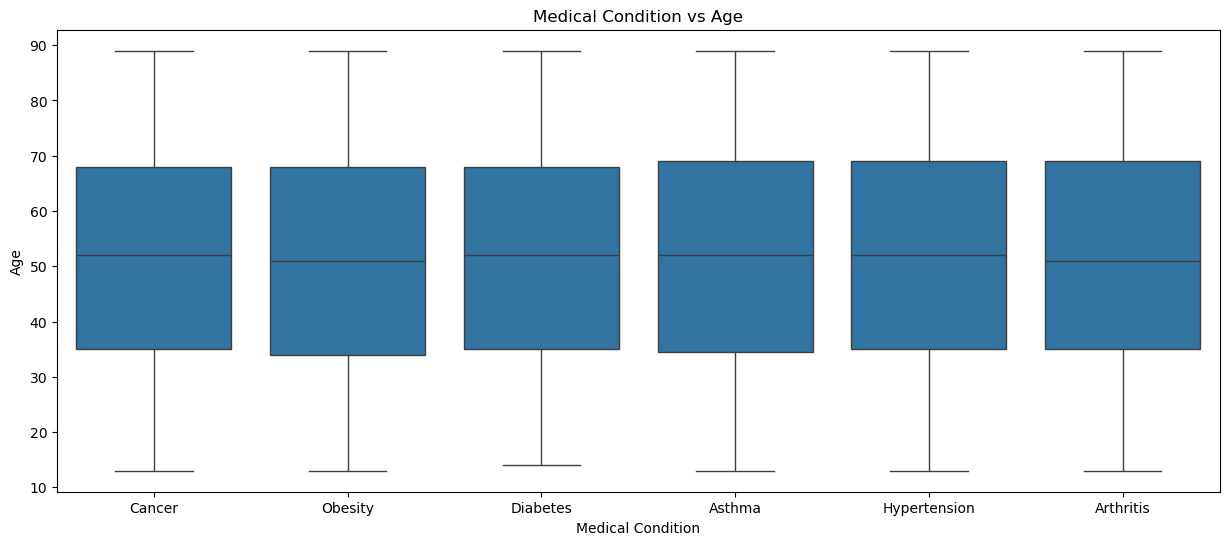

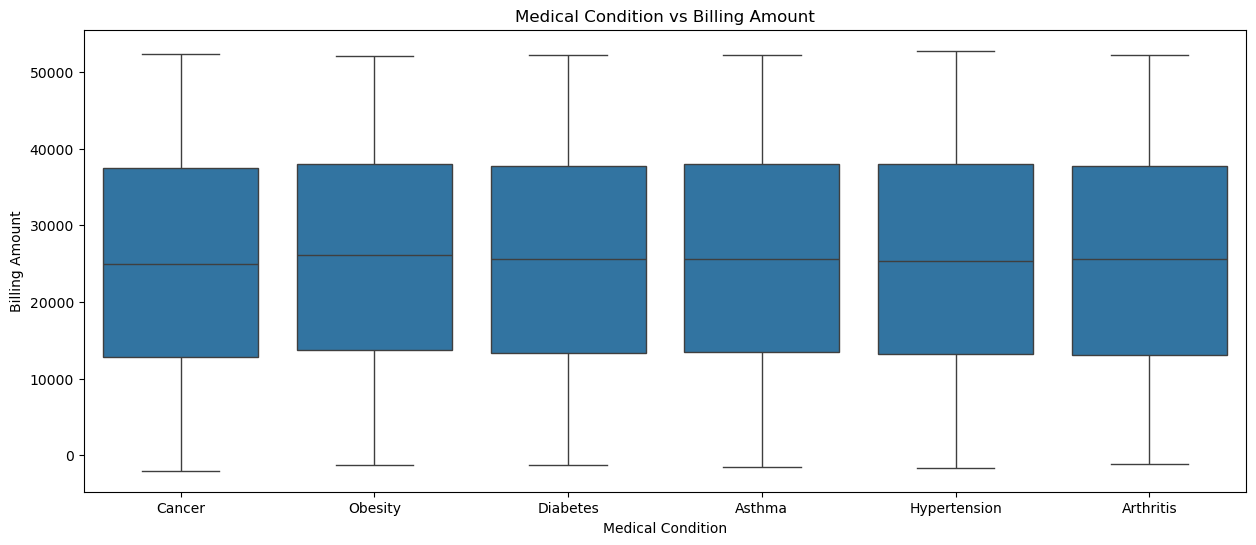

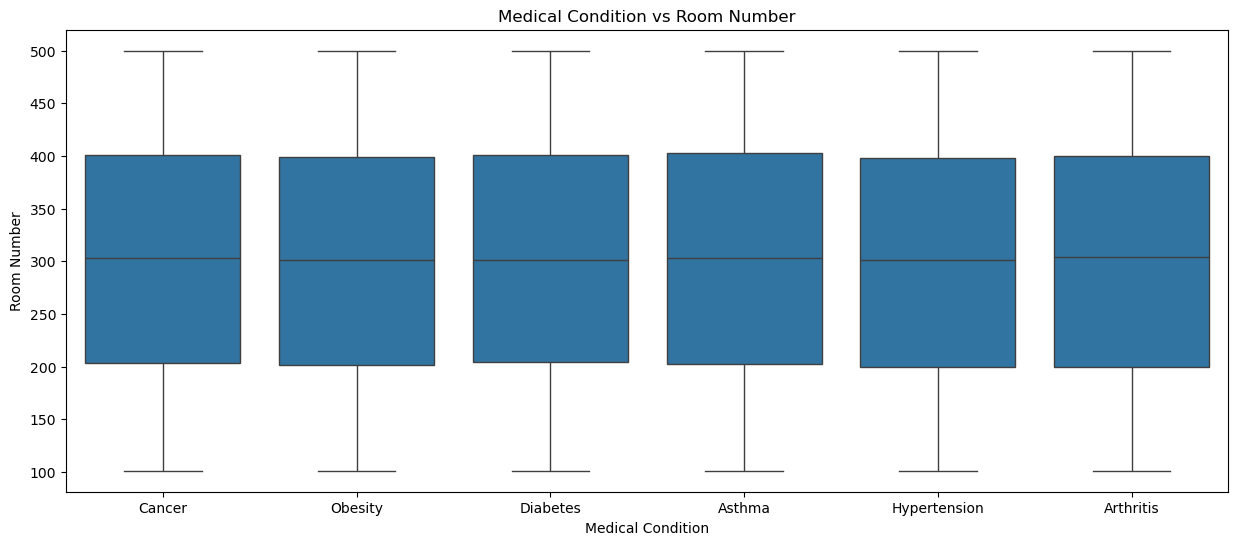

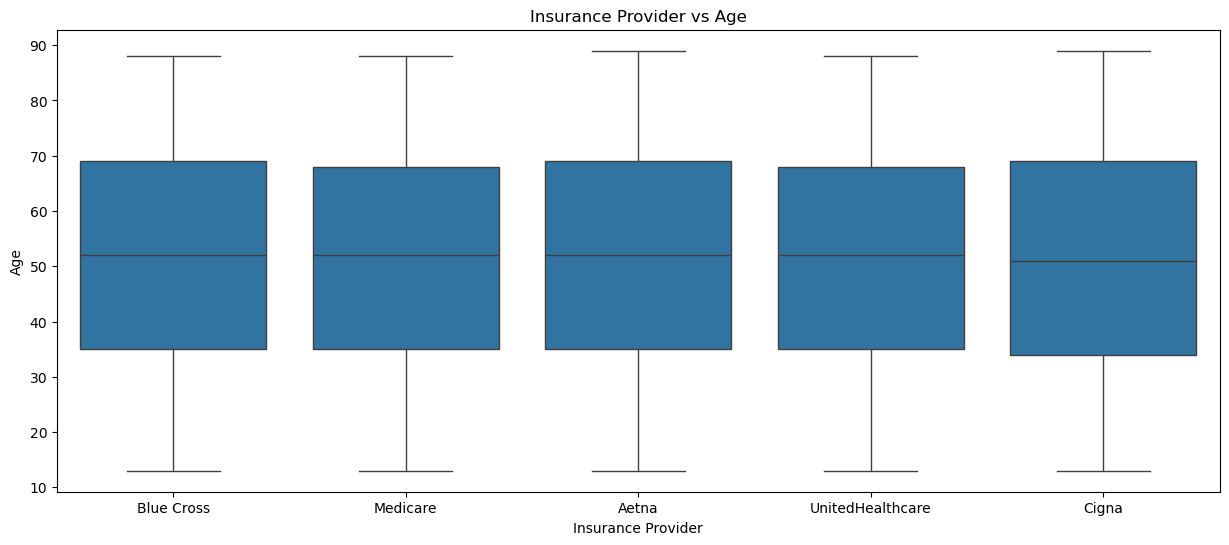

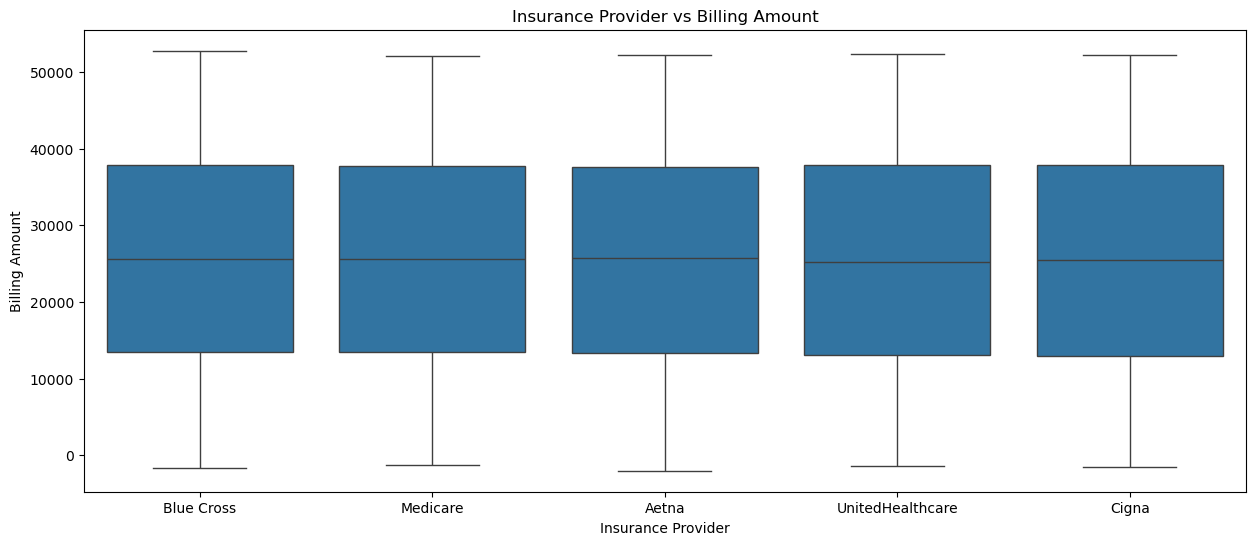

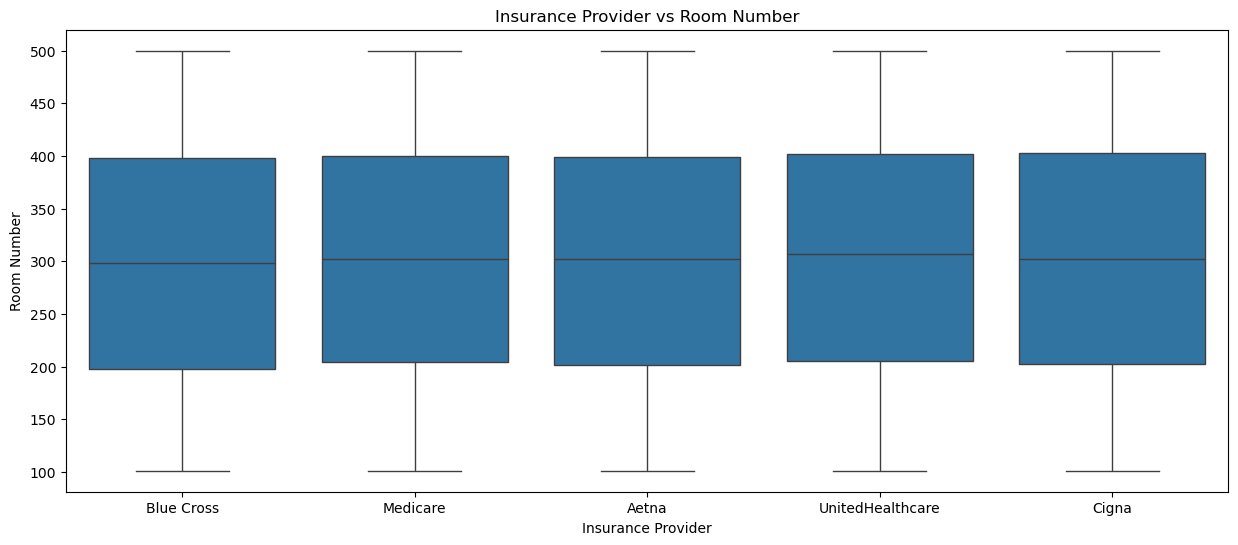

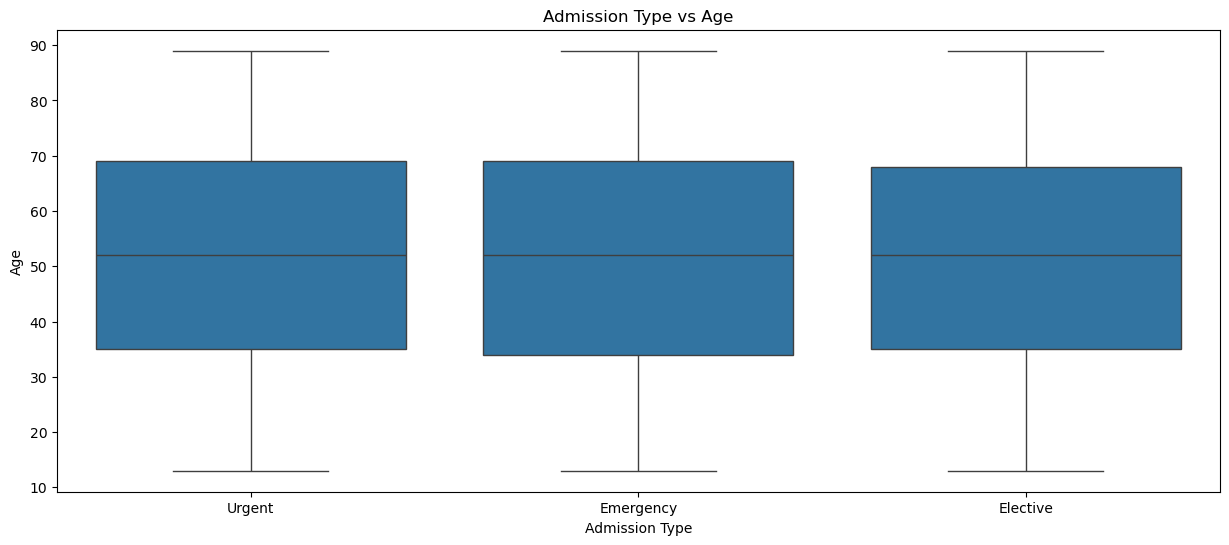

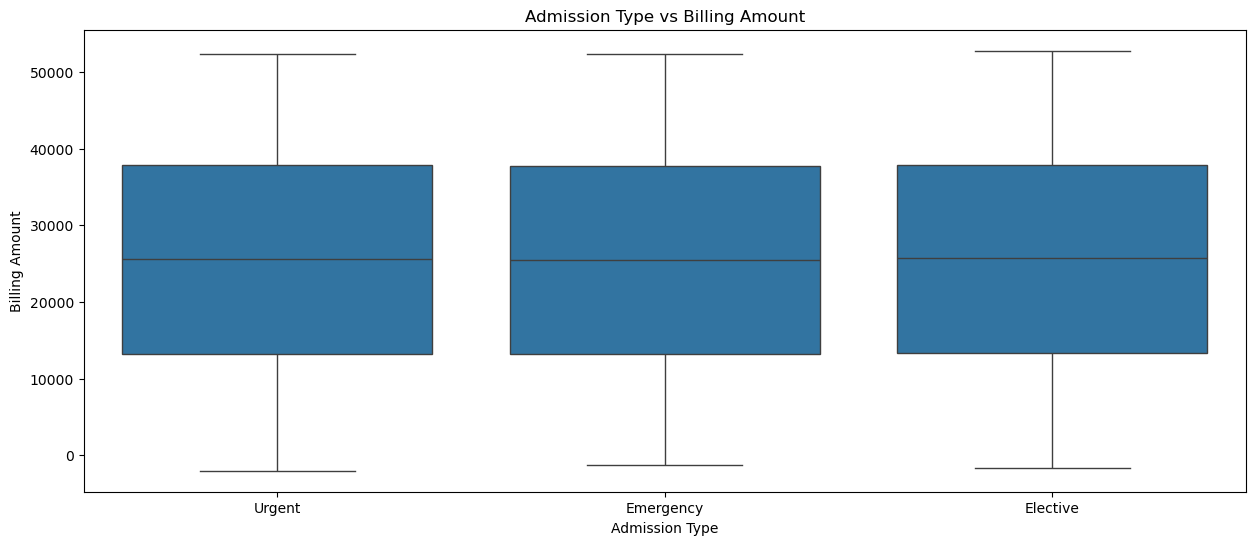

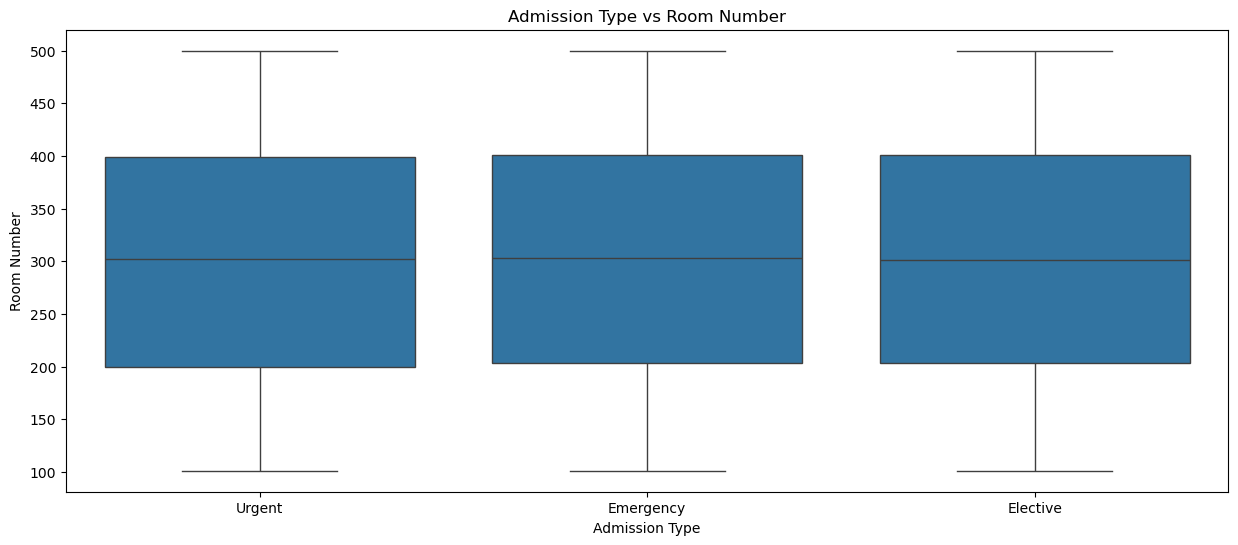

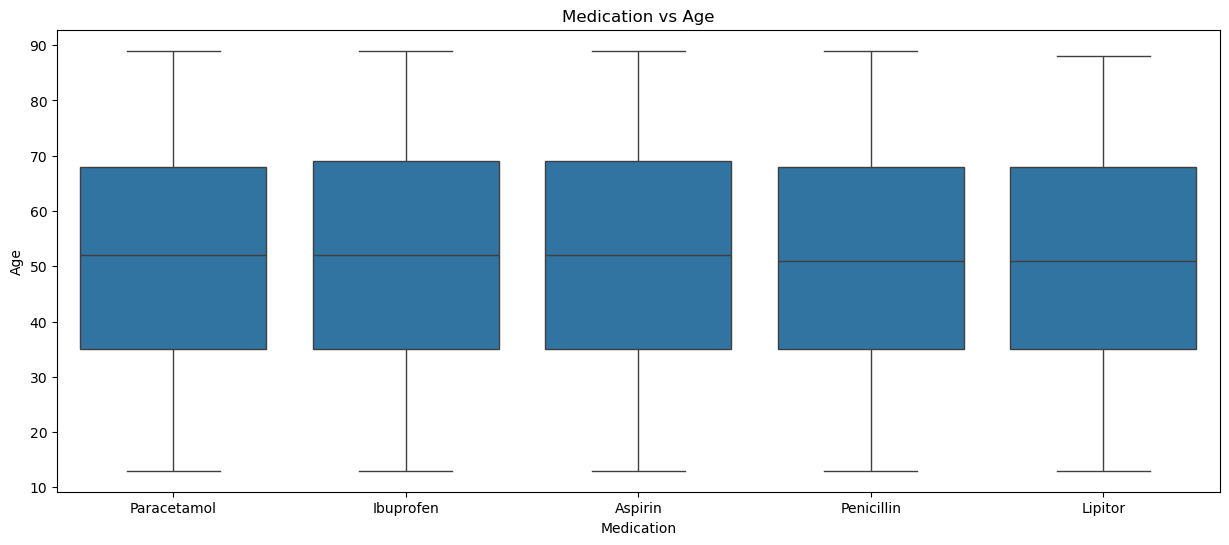

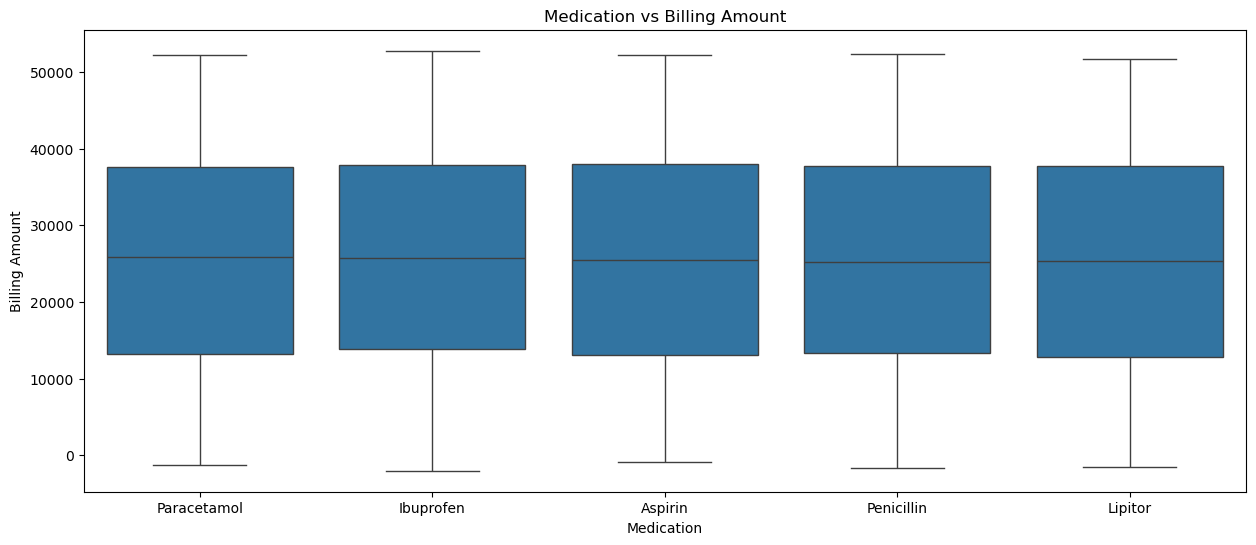

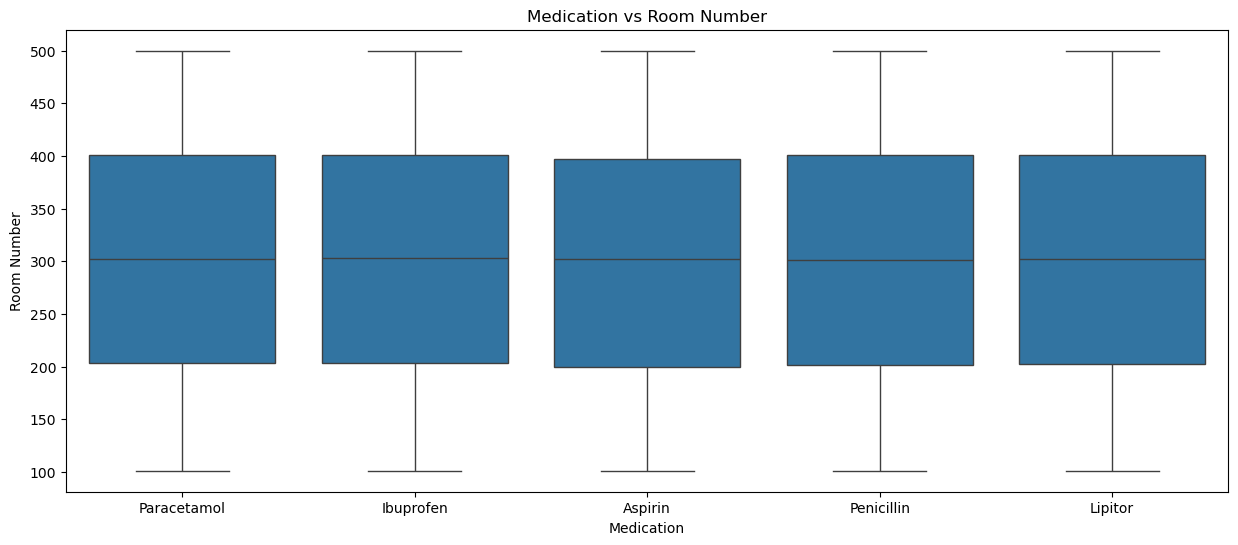

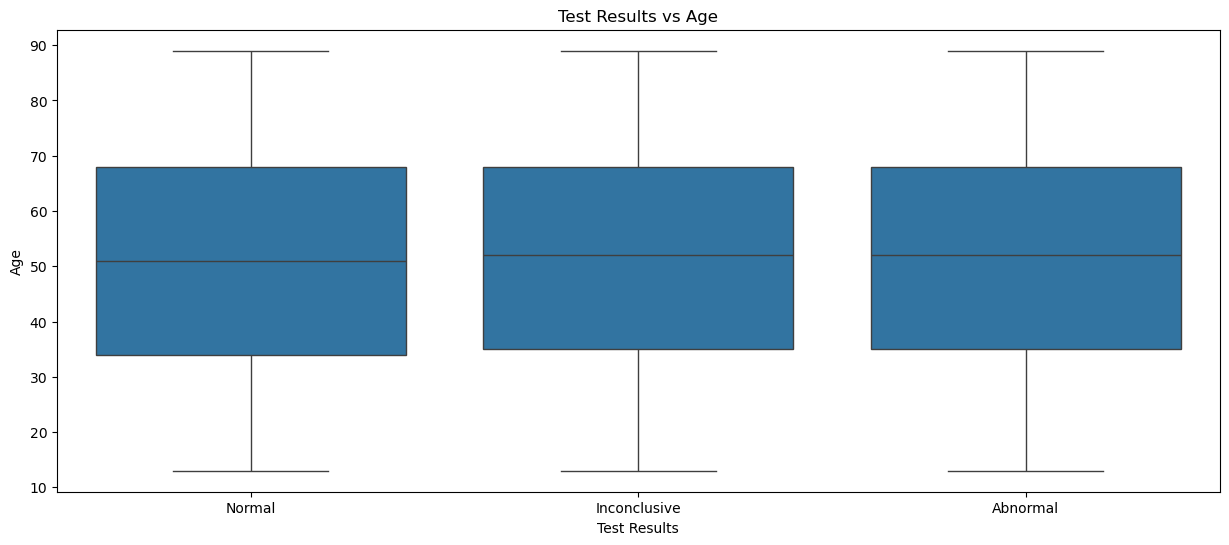

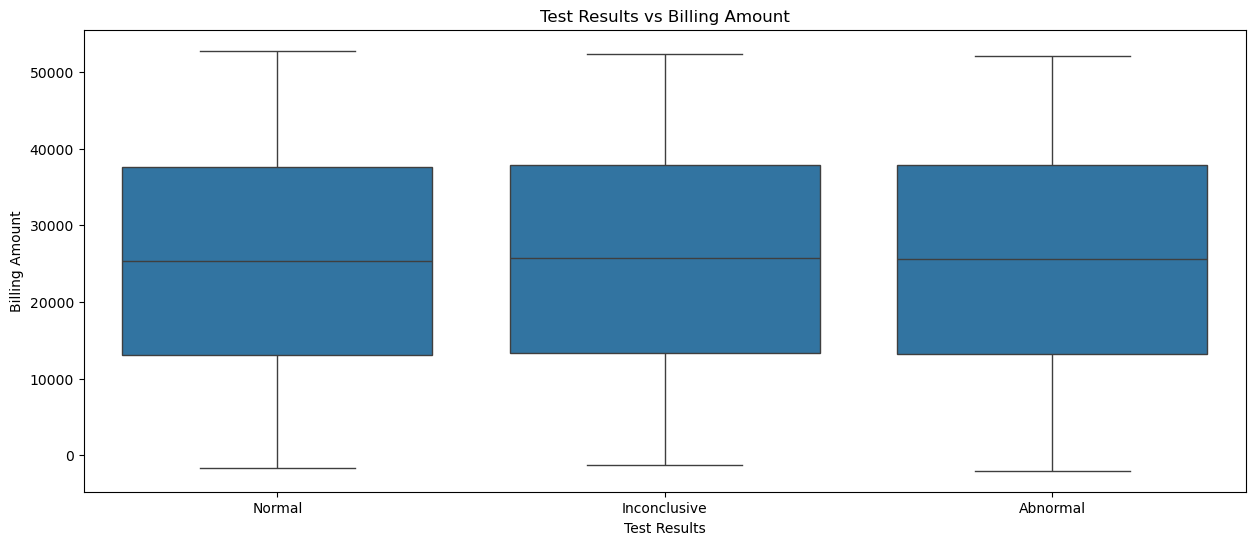

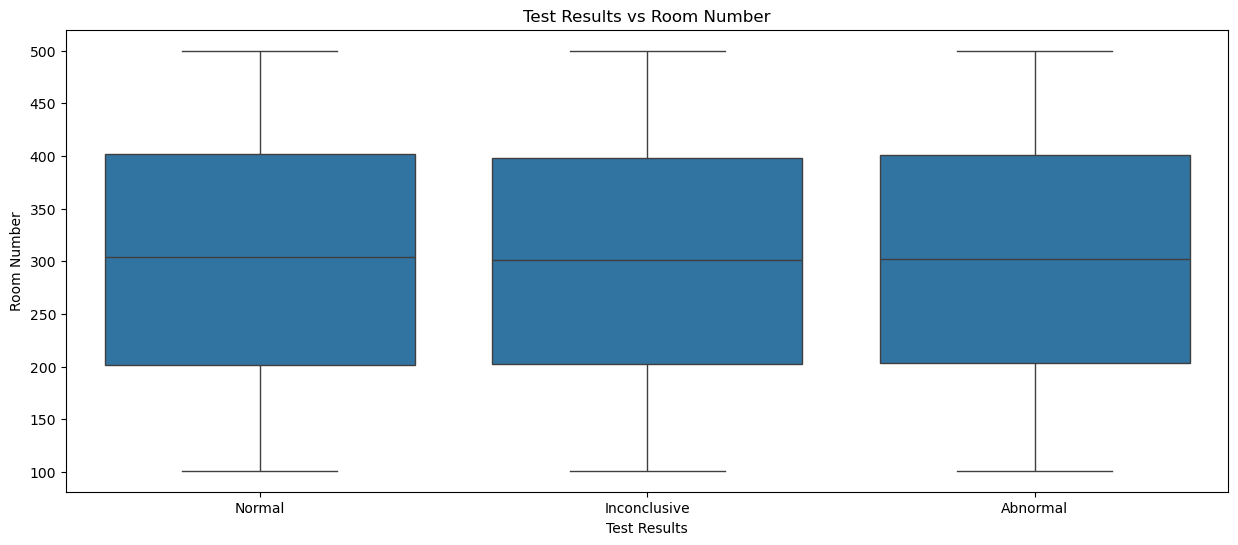

In [442]:
for dis in categorical_features:
    for con in continuous_features:
        plt.figure(figsize=(15,6))
        sns.boxplot(data= df,x = dis,y= con)
        plt.title(f'{dis} vs {con}')
        plt.show()

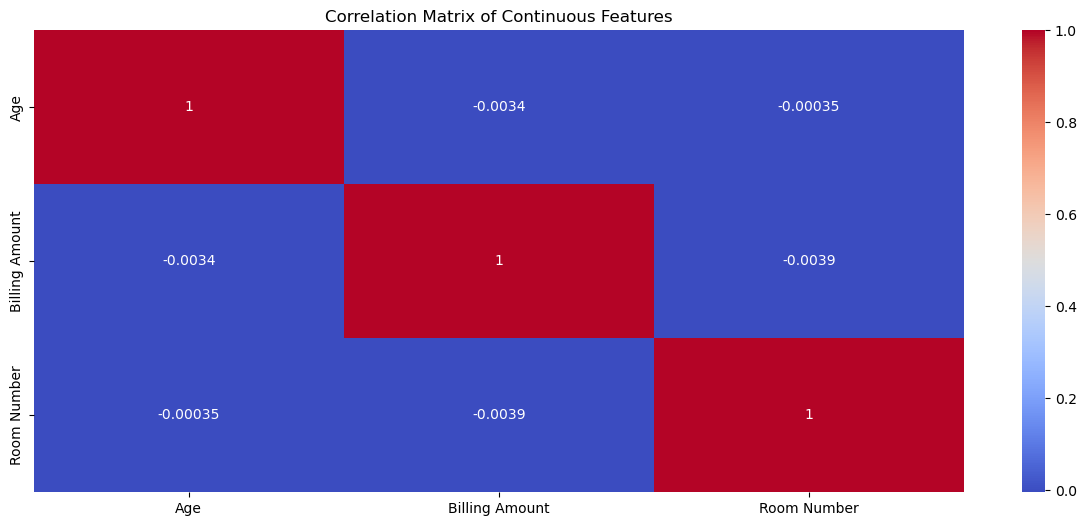

In [443]:
corr_matrix = df[continuous_features].corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

In [444]:
corr_matrix

Age  Billing Amount  Room Number
Age             1.000000       -0.003427    -0.000352
Billing Amount -0.003427        1.000000    -0.003930
Room Number    -0.000352       -0.003930     1.000000

In [445]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['Gender']=='Male']['Billing Amount'], 
                         df[df['Gender']=='Female']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 1.3408137444079473, p-value = 0.24689554522480017


In [446]:
f_stat,p_val  = f_oneway(df[df['Blood Type']=='B-']['Billing Amount'],
                         df[df['Blood Type']=='A+']['Billing Amount'],
                         df[df['Blood Type']=='A-']['Billing Amount'],
                         df[df['Blood Type']=='O+']['Billing Amount'],
                         df[df['Blood Type']=='AB+']['Billing Amount'],
                         df[df['Blood Type']=='AB-']['Billing Amount'],
                         df[df['Blood Type']=='B+']['Billing Amount'],
                         df[df['Blood Type']=='O-']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 1.3149558699287003, p-value = 0.23831644878389951


In [447]:
f_stat,p_val  = f_oneway(df[df['Medical Condition']=='Cancer']['Billing Amount'],
                         df[df['Medical Condition']=='Obesity']['Billing Amount'],
                         df[df['Medical Condition']=='Diabetes']['Billing Amount'],
                         df[df['Medical Condition']=='Asthma']['Billing Amount'],
                         df[df['Medical Condition']=='Hypertension']['Billing Amount'],
                         df[df['Medical Condition']=='Arthritis']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 2.2242499906622233, p-value = 0.04904383935795031


In [448]:
f_stat,p_val  = f_oneway(df[df['Insurance Provider']=='Blue Cross']['Billing Amount'],
                         df[df['Insurance Provider']=='Medicare']['Billing Amount'],
                         df[df['Insurance Provider']=='Aetna']['Billing Amount'],
                         df[df['Insurance Provider']=='UnitedHealthcare']['Billing Amount'],
                         df[df['Insurance Provider']=='Cigna']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA Result: F-statistic = 0.3787399008722057, p-value = 0.8239871117559058


In [449]:
f_stat,p_val  = f_oneway(df[df['Admission Type']=='Urgent']['Billing Amount'],
                         df[df['Admission Type']=='Emergency']['Billing Amount'],
                         df[df['Admission Type']=='Elective']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 0.31899845140694455, p-value = 0.7268780206920686


In [450]:

f_stat,p_val  = f_oneway(df[df['Medication']=='Paracetamol']['Billing Amount'],
                         df[df['Medication']=='Ibuprofen']['Billing Amount'],
                         df[df['Medication']=='Aspirin']['Billing Amount'],
                         df[df['Medication']=='Penicillin']['Billing Amount'],
                         df[df['Medication']=='Lipitor']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA Result: F-statistic = 1.21962605658176, p-value = 0.30000600926890775


In [451]:

for cat in categorical_features:
    print(f"Results for {cat}:")
    for con in continuous_features:
        groups = [df[df[cat]==group][con] for group in df[cat].unique()]
    
        if all(not group.empty for group in groups):
            f_stat,p_val = f_oneway(*groups)
            print(f'Anova for {cat} and {con} - fvalue:{f_stat},p-value:{p_val}')
        else:
            print(f'Anova for {cat} and {con} : One or more groups are empty')
            
    print()

Results for Gender:
Anova for Gender and Age - fvalue:0.34629403312876966,p-value:0.5562209405265998
Anova for Gender and Billing Amount - fvalue:1.3408137444079473,p-value:0.24689554522480017
Anova for Gender and Room Number - fvalue:2.515141674976748,p-value:0.11276325182244697

Results for Blood Type:
Anova for Blood Type and Age - fvalue:0.5624181530522901,p-value:0.7870085276327103
Anova for Blood Type and Billing Amount - fvalue:1.3149558699287003,p-value:0.23831644878389951
Anova for Blood Type and Room Number - fvalue:0.8523101111888031,p-value:0.5437110875294803

Results for Medical Condition:
Anova for Medical Condition and Age - fvalue:0.6208999738453609,p-value:0.68387926896167
Anova for Medical Condition and Billing Amount - fvalue:2.2242499906622233,p-value:0.04904383935795031
Anova for Medical Condition and Room Number - fvalue:0.7258978281842324,p-value:0.6038942511506911

Results for Insurance Provider:
Anova for Insurance Provider and Age - fvalue:0.6013452922674022,p

In [452]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [453]:
categorical_features

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [454]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [455]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [456]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [457]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [458]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [459]:
from scipy.stats import chi2_contingency

In [460]:
contingency_table = pd.crosstab(df['Admission Type'],df['Medical Condition'])
contingency_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3062    3069    3114      3031          3182     3015
Emergency               3073    2978    2988      2988          2975     3100
Urgent                  3083    3048    3038      3197          2994     3031

In [461]:
chi2,p,dof,ex = chi2_contingency(contingency_table)
print(f'Chi-square test result: chi2 = {chi2},p-value = {p}')

Chi-square test result: chi2 = 17.8903466905814,p-value = 0.05684174826535973


In [462]:
for cat1 in categorical_features:
    for cat2 in categorical_features:
        contingency_table = pd.crosstab(df[cat1],df[cat2])
    print(contingency_table)
    chi2,p,dof,ex = chi2_contingency(contingency_table)
    print(f'Chi-square test result: chi2 = {chi2},p-value = {p}')
    print()

Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9247          9143    9080
Male              9190          9055    9251
Chi-square test result: chi2 = 2.1846316308915408,p-value = 0.33543877922666065

Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                2314          2308    2274
A-                2312          2279    2307
AB+               2281          2309    2292
AB-               2310          2224    2340
B+                2281          2349    2255
B-                2324          2247    2301
O+                2326          2242    2287
O-                2289          2240    2275
Chi-square test result: chi2 = 8.001800404507538,p-value = 0.8892322033448401

Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3156          3062    3000
Asthma                 2980          2999    3116
Cancer    

In [463]:
fig = px.scatter_3d(df,x= 'Age',y='Billing Amount',z = 'Room Number',color = 'Gender')
fig.show()

In [464]:
pivot_table = pd.pivot_table(df,values = ['Billing Amount','Age'],
                            index = ['Gender','Medical Condition','Admission Type'],
                            aggfunc = {'Billing Amount' : 'mean','Age' : 'mean'})
pivot_table

Age  Billing Amount
Gender Medical Condition Admission Type                           
Female Arthritis         Elective        50.254990    25414.144607
                         Emergency       51.998072    25036.389922
                         Urgent          51.994129    25564.679900
       Asthma            Elective        51.147573    25490.918214
                         Emergency       51.568047    25468.207193
                         Urgent          52.420761    25101.857316
       Cancer            Elective        52.092208    25312.309738
                         Emergency       50.736944    25097.513220
                         Urgent          51.152542    25451.511538
       Diabetes          Elective        51.024918    25709.493051
                         Emergency       51.980731    25565.425113
                         Urgent          51.797973    25404.787550
       Hypertension      Elective        52.416406    25529.889579
                         Emergency       51.614353    25118.920307
                         Urgent          52.363268    25650.239970
       Obesity           Elective        52.106509    25465.834357
                         Emergency       51.024643    26392.463194
                         Urgent          50.866225    25746.819797
Male   Arthritis         Elective        51.591120    25546.952631
                         Emergency       51.445616    25969.665058
                         Urgent          51.963871    25552.155465
       Asthma            Elective        51.488845    25013.631482
                         Emergency       52.054907    26337.884796
                         Urgent          50.992514    26355.873985
       Cancer            Elective        51.183609    26023.609166
                         Emergency       52.953375    24618.664505
                         Urgent          51.230326    24379.955530
       Diabetes          Elective        51.297477    26358.827135
                         Emergency       51.469993    25376.403502
                         Urgent          51.891842    25562.589495
       Hypertension      Elective        50.913565    25580.478874
                         Emergency       50.720350    25825.482969
                         Urgent          52.272307    25311.874010
       Obesity           Elective        51.711513    25913.641197
                         Emergency       51.019897    25254.517370
                         Urgent          50.684418    26059.675047

In [465]:
pivot_table = pd.pivot_table(df,values = ['Billing Amount'],
                            index = ['Insurance Provider','Test Results'],
                            aggfunc = 'sum')
pivot_table

Billing Amount
Insurance Provider Test Results                
Aetna              Abnormal        9.171489e+07
                   Inconclusive    9.330576e+07
                   Normal          9.147809e+07
Blue Cross         Abnormal        9.248506e+07
                   Inconclusive    9.548302e+07
                   Normal          9.244101e+07
Cigna              Abnormal        9.562466e+07
                   Inconclusive    9.488665e+07
                   Normal          9.382279e+07
Medicare           Abnormal        9.634342e+07
                   Inconclusive    9.258157e+07
                   Normal          9.398603e+07
UnitedHealthcare   Abnormal        9.478735e+07
                   Inconclusive    9.029127e+07
                   Normal          9.483675e+07

In [466]:
pivot_table = pd.pivot_table(df,values = ['Billing Amount'],
                            index = ['Medical Condition','Gender'],
                            aggfunc = ['sum','mean','count','min','max'])
pivot_table

sum           mean          count  \
                         Billing Amount Billing Amount Billing Amount   
Medical Condition Gender                                                
Arthritis         Female   1.176154e+08   25337.234722           4642   
                  Male     1.175522e+08   25688.849297           4576   
Asthma            Female   1.143928e+08   25358.633474           4511   
                  Male     1.187435e+08   25903.913291           4584   
Cancer            Female   1.154482e+08   25284.314393           4566   
                  Male     1.144441e+08   25020.562355           4574   
Diabetes          Female   1.177971e+08   25558.060586           4609   
                  Male     1.186899e+08   25762.941147           4607   
Hypertension      Female   1.162115e+08   25434.788625           4569   
                  Male     1.171669e+08   25571.135120           4582   
Obesity           Female   1.183084e+08   25871.071549           4573   
                  Male     1.176983e+08   25737.652254           4573   

                                    min            max  
                         Billing Amount Billing Amount  
Medical Condition Gender                                
Arthritis         Female    -964.798619    52170.03685  
                  Male     -1129.997176    51975.96814  
Asthma            Female   -1306.662189    52181.83779  
                  Male     -1520.420555    51336.22121  
Cancer            Female   -2008.492140    52373.03237  
                  Male     -1277.645337    52092.66990  
Diabetes          Female    -860.617987    52211.85297  
                  Male     -1316.618581    51848.20160  
Hypertension      Female    -652.181369    52764.27674  
                  Male     -1660.009373    52271.66375  
Obesity           Female    -967.594706    51501.64977  
                  Male     -1310.272895    52024.72644

In [467]:
grouped_data = df.groupby(['Gender','Medical Condition'])[['Billing Amount','Age']].mean()
grouped_data

Billing Amount        Age
Gender Medical Condition                           
Female Arthritis            25337.234722  51.413615
       Asthma               25358.633474  51.697185
       Cancer               25284.314393  51.328296
       Diabetes             25558.060586  51.601866
       Hypertension         25434.788625  52.137448
       Obesity              25871.071549  51.332167
Male   Arthritis            25688.849297  51.669143
       Asthma               25903.913291  51.495201
       Cancer               25020.562355  51.755575
       Diabetes             25762.941147  51.561754
       Hypertension         25571.135120  51.299651
       Obesity              25737.652254  51.134266

In [468]:
grouped_data = df.groupby('Admission Type')['Billing Amount'].agg([('med','median'),('Standard Deviation','std')])
grouped_data

med  Standard Deviation
Admission Type                                 
Elective        25674.73536        14220.835323
Emergency       25413.78104        14159.764673
Urgent          25543.55847        14244.202912

<Axes: xlabel='Admission Type'>

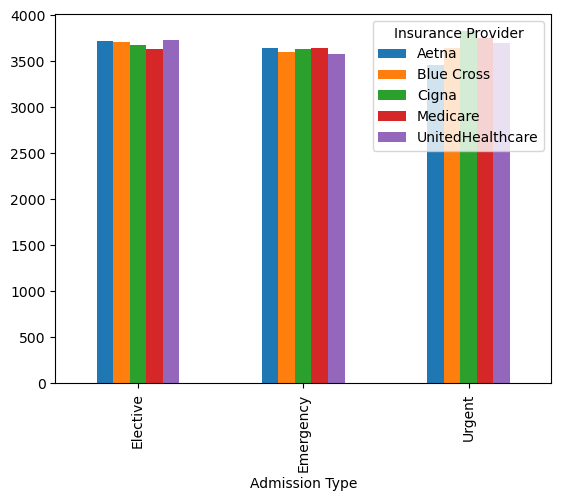

In [469]:
pd.crosstab(df['Admission Type'],df['Insurance Provider']).plot(kind ='bar')

In [470]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\4155390178.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  object        
 13  Medication          54966 non-null  object        


In [472]:
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

In [473]:
df.head(3)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0     Matthew Smith  Sons and Miller         Blue Cross     18856.28131   
1   Samantha Davies          Kim Inc           Medicare     33643.32729   
2  Tiffany Mitchell         Cook PLC              Aetna     27955.09608   

   Room Number Admission Type Discharge Date   Medication  Test Results  \
0          328         Urgent     02-02-2024  Paracetamol        Normal   
1          265      Emergency     26-08-2019    Ibuprofen  Inconclusive   
2          205      Emergency     07-10-2022      Aspirin        Normal   

   Admission Day  Admission Month  Admission Year  
0             31                1            2024  
1             20                8            2019  
2             22                9            2022

In [474]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],format = '%d-%m-%Y')

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [476]:
df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

In [477]:
df.head(3)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   

             Doctor         Hospital Insurance Provider  Billing Amount  ...  \
0     Matthew Smith  Sons and Miller         Blue Cross     18856.28131  ...   
1   Samantha Davies          Kim Inc           Medicare     33643.32729  ...   
2  Tiffany Mitchell         Cook PLC              Aetna     27955.09608  ...   

   Admission Type Discharge Date   Medication  Test Results Admission Day  \
0          Urgent     2024-02-02  Paracetamol        Normal            31   
1       Emergency     2019-08-26    Ibuprofen  Inconclusive            20   
2       Emergency     2022-10-07      Aspirin        Normal            22   

   Admission Month  Admission Year  Discharge Day  Discharge Month  \
0                1            2024              2                2   
1                8            2019             26                8   
2                9            2022              7               10   

   Discharge Year  
0            2024  
1            2019  
2            2022  

[3 rows x 21 columns]

In [478]:
df['Days'] = df['Discharge Date']-df['Date of Admission']

In [479]:
df.head(3)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   

             Doctor         Hospital Insurance Provider  Billing Amount  ...  \
0     Matthew Smith  Sons and Miller         Blue Cross     18856.28131  ...   
1   Samantha Davies          Kim Inc           Medicare     33643.32729  ...   
2  Tiffany Mitchell         Cook PLC              Aetna     27955.09608  ...   

   Discharge Date   Medication  Test Results Admission Day Admission Month  \
0      2024-02-02  Paracetamol        Normal            31               1   
1      2019-08-26    Ibuprofen  Inconclusive            20               8   
2      2022-10-07      Aspirin        Normal            22               9   

   Admission Year  Discharge Day  Discharge Month  Discharge Year    Days  
0            2024              2                2            2024  2 days  
1            2019             26                8            2019  6 days  
2            2022              7               10            2022 15 days  

[3 rows x 22 columns]

In [480]:
df = df.drop(['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Room Number','Discharge Date'],axis = 1)

In [481]:
df.head(3)

Age  Gender Blood Type Medical Condition  Billing Amount Admission Type  \
0   30    Male         B-            Cancer     18856.28131         Urgent   
1   62    Male         A+           Obesity     33643.32729      Emergency   
2   76  Female         A-           Obesity     27955.09608      Emergency   

    Medication  Test Results  Admission Day  Admission Month  Admission Year  \
0  Paracetamol        Normal             31                1            2024   
1    Ibuprofen  Inconclusive             20                8            2019   
2      Aspirin        Normal             22                9            2022   

   Discharge Day  Discharge Month  Discharge Year    Days  
0              2                2            2024  2 days  
1             26                8            2019  6 days  
2              7               10            2022 15 days

In [482]:
df=df.drop(['Billing Amount','Admission Day','Admission Month','Admission Year','Discharge Day','Discharge Month','Discharge Year'],axis = 1)

In [483]:
df.head(3)

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   

   Test Results    Days  
0        Normal  2 days  
1  Inconclusive  6 days  
2        Normal 15 days

In [484]:
df['Days'] = df['Days'].astype(str)
df['Days_numeric'] = df['Days'].str.split().str[0].astype(int)

In [485]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results     Days  Days_numeric  
0        Normal   2 days             2  
1  Inconclusive   6 days             6  
2        Normal  15 days            15  
3      Abnormal  30 days            30  
4      Abnormal  20 days            20

In [486]:
df = df.drop(['Days'],axis = 1)

In [487]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results  Days_numeric  
0        Normal             2  
1  Inconclusive             6  
2        Normal            15  
3      Abnormal            30  
4      Abnormal            20

In [488]:
categorical_features,non_categorical_features,discrete_features,continuous_features = feature_separation(df)

In [489]:
print('categorical_features',categorical_features)
print('non_categorical_features',non_categorical_features)
print('discrete_features',discrete_features)
print('continuous_features',continuous_features)

categorical_features ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
non_categorical_features []
discrete_features []
continuous_features ['Age']


In [490]:
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

In [491]:
print('categorical_features',categorical_features)

categorical_features ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']


In [492]:
df_dummies = pd.get_dummies(df[categorical_features ],drop_first = True)

In [493]:
df_dummies = df_dummies.astype(int)

In [494]:
df = pd.concat([df.drop(columns =categorical_features),df_dummies],axis = 1)

In [495]:
df.head(3)

Age  Test Results  Days_numeric  Gender_Male  Blood Type_A-  \
0   30        Normal             2            1              0   
1   62  Inconclusive             6            1              0   
2   76        Normal            15            0              1   

   Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
0               0               0              0              1   
1               0               0              0              0   
2               0               0              0              0   

   Blood Type_O+  ...  Medical Condition_Cancer  Medical Condition_Diabetes  \
0              0  ...                         1                           0   
1              0  ...                         0                           0   
2              0  ...                         0                           0   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                               0                          0   
1                               0                          1   
2                               0                          1   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   
2                         1                      0                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  
0                   0                       1                      0  
1                   0                       0                      0  
2                   0                       0                      0  

[3 rows x 22 columns]

In [496]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [497]:
test_result_mapping = {'Normal':0,'Abnormal': 1,'Inconclusive':2 }


In [498]:
df['Test Result_Numeric'] = df['Test Results'].replace(test_result_mapping)

C:\Users\kisho\AppData\Local\Temp\ipykernel_3884\2489088672.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [499]:
df.head(3)

Age  Test Results  Days_numeric  Gender_Male  Blood Type_A-  \
0   30        Normal             2            1              0   
1   62  Inconclusive             6            1              0   
2   76        Normal            15            0              1   

   Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
0               0               0              0              1   
1               0               0              0              0   
2               0               0              0              0   

   Blood Type_O+  ...  Medical Condition_Diabetes  \
0              0  ...                           0   
1              0  ...                           0   
2              0  ...                           0   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                               0                          0   
1                               0                          1   
2                               0                          1   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   
2                         1                      0                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  \
0                   0                       1                      0   
1                   0                       0                      0   
2                   0                       0                      0   

   Test Result_Numeric  
0                    0  
1                    2  
2                    0  

[3 rows x 23 columns]

In [501]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("+", "_plus")
df.columns = df.columns.str.replace("-", "_minus")

In [503]:
df.head(2)

Age  Test_Results  Days_numeric  Gender_Male  Blood_Type_A_minus  \
0   30        Normal             2            1                   0   
1   62  Inconclusive             6            1                   0   

   Blood_Type_AB_plus  Blood_Type_AB_minus  Blood_Type_B_plus  \
0                   0                    0                  0   
1                   0                    0                  0   

   Blood_Type_B_minus  Blood_Type_O_plus  ...  Medical_Condition_Diabetes  \
0                   1                  0  ...                           0   
1                   0                  0  ...                           0   

   Medical_Condition_Hypertension  Medical_Condition_Obesity  \
0                               0                          0   
1                               0                          1   

   Admission_Type_Emergency  Admission_Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  \
0                   0                       1                      0   
1                   0                       0                      0   

   Test_Result_Numeric  
0                    0  
1                    2  

[2 rows x 23 columns]

In [504]:
df = df.drop(['Test_Results'], axis  = 1)

In [505]:
df.head(3)

Age  Days_numeric  Gender_Male  Blood_Type_A_minus  Blood_Type_AB_plus  \
0   30             2            1                   0                   0   
1   62             6            1                   0                   0   
2   76            15            0                   1                   0   

   Blood_Type_AB_minus  Blood_Type_B_plus  Blood_Type_B_minus  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   0   

   Blood_Type_O_plus  Blood_Type_O_minus  ...  Medical_Condition_Diabetes  \
0                  0                   0  ...                           0   
1                  0                   0  ...                           0   
2                  0                   0  ...                           0   

   Medical_Condition_Hypertension  Medical_Condition_Obesity  \
0                               0                          0   
1                               0                          1   
2                               0                          1   

   Admission_Type_Emergency  Admission_Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   
2                         1                      0                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  \
0                   0                       1                      0   
1                   0                       0                      0   
2                   0                       0                      0   

   Test_Result_Numeric  
0                    0  
1                    2  
2                    0  

[3 rows x 22 columns]

In [506]:
y = df['Test_Result_Numeric']
y

0        0
1        2
2        0
3        1
4        1
        ..
55495    1
55496    0
55497    1
55498    1
55499    1
Name: Test_Result_Numeric, Length: 54966, dtype: int64

In [508]:
X = df.drop('Test_Result_Numeric',axis = 1)
X

Age  Days_numeric  Gender_Male  Blood_Type_A_minus  Blood_Type_AB_plus  \
0       30             2            1                   0                   0   
1       62             6            1                   0                   0   
2       76            15            0                   1                   0   
3       28            30            0                   0                   0   
4       43            20            0                   0                   1   
...    ...           ...          ...                 ...                 ...   
55495   42            30            0                   0                   0   
55496   61             9            0                   0                   0   
55497   38            28            0                   0                   0   
55498   43             6            1                   0                   0   
55499   53            27            0                   0                   0   

       Blood_Type_AB_minus  Blood_Type_B_plus  Blood_Type_B_minus  \
0                        0                  0                   1   
1                        0                  0                   0   
2                        0                  0                   0   
3                        0                  0                   0   
4                        0                  0                   0   
...                    ...                ...                 ...   
55495                    0                  0                   0   
55496                    1                  0                   0   
55497                    0                  1                   0   
55498                    0                  0                   0   
55499                    0                  0                   0   

       Blood_Type_O_plus  Blood_Type_O_minus  ...  Medical_Condition_Cancer  \
0                      0                   0  ...                         1   
1                      0                   0  ...                         0   
2                      0                   0  ...                         0   
3                      1                   0  ...                         0   
4                      0                   0  ...                         1   
...                  ...                 ...  ...                       ...   
55495                  1                   0  ...                         0   
55496                  0                   0  ...                         0   
55497                  0                   0  ...                         0   
55498                  0                   1  ...                         0   
55499                  1                   0  ...                         0   

       Medical_Condition_Diabetes  Medical_Condition_Hypertension  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   
...                           ...                             ...   
55495                           0                               0   
55496                           0                               0   
55497                           0                               1   
55498                           0                               0   
55499                           0                               0   

       Medical_Condition_Obesity  Admission_Type_Emergency  \
0                              0                         0   
1                              1                         1   
2                              1                         1   
3                              0                         0   
4                              0                         0   
...                          ...                       

In [509]:
df.columns

Index(['Age', 'Days_numeric', 'Gender_Male', 'Blood_Type_A_minus',
       'Blood_Type_AB_plus', 'Blood_Type_AB_minus', 'Blood_Type_B_plus',
       'Blood_Type_B_minus', 'Blood_Type_O_plus', 'Blood_Type_O_minus',
       'Medical_Condition_Asthma', 'Medical_Condition_Cancer',
       'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension',
       'Medical_Condition_Obesity', 'Admission_Type_Emergency',
       'Admission_Type_Urgent', 'Medication_Ibuprofen', 'Medication_Lipitor',
       'Medication_Paracetamol', 'Medication_Penicillin',
       'Test_Result_Numeric'],
      dtype='object')

In [510]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Name: Logistic_Regression
Accuracy :  0.34038811400849
Classification Report : 
                precision    recall  f1-score   support

           0       0.35      0.30      0.32      5541
           1       0.34      0.44      0.38      5522
           2       0.33      0.28      0.31      5427

    accuracy                           0.34     16490
   macro avg       0.34      0.34      0.34     16490
weighted avg       0.34      0.34      0.34     16490

ROC AUC Score :  0.50344025882623


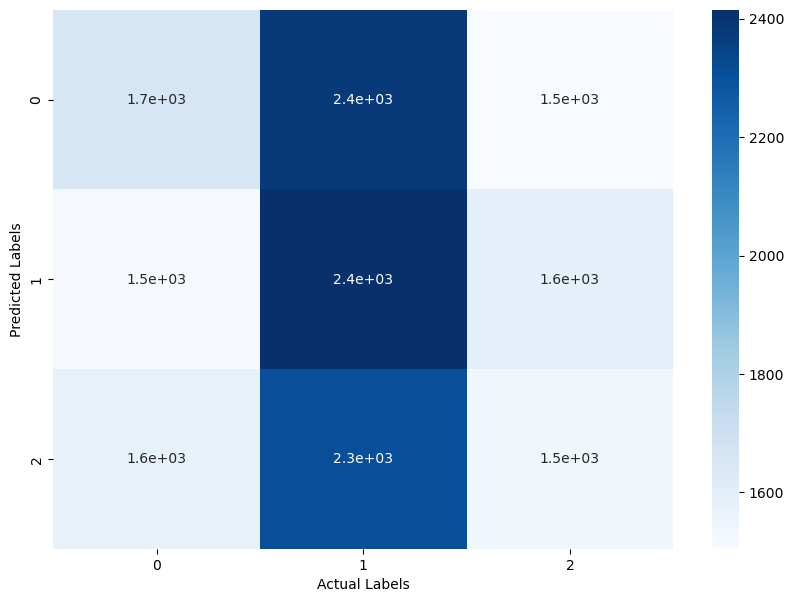



Model Name: Random_Forest
Accuracy :  0.40218314129775623
Classification Report : 
                precision    recall  f1-score   support

           0       0.40      0.40      0.40      5541
           1       0.40      0.41      0.41      5522
           2       0.40      0.39      0.40      5427

    accuracy                           0.40     16490
   macro avg       0.40      0.40      0.40     16490
weighted avg       0.40      0.40      0.40     16490

ROC AUC Score :  0.5775879558894286


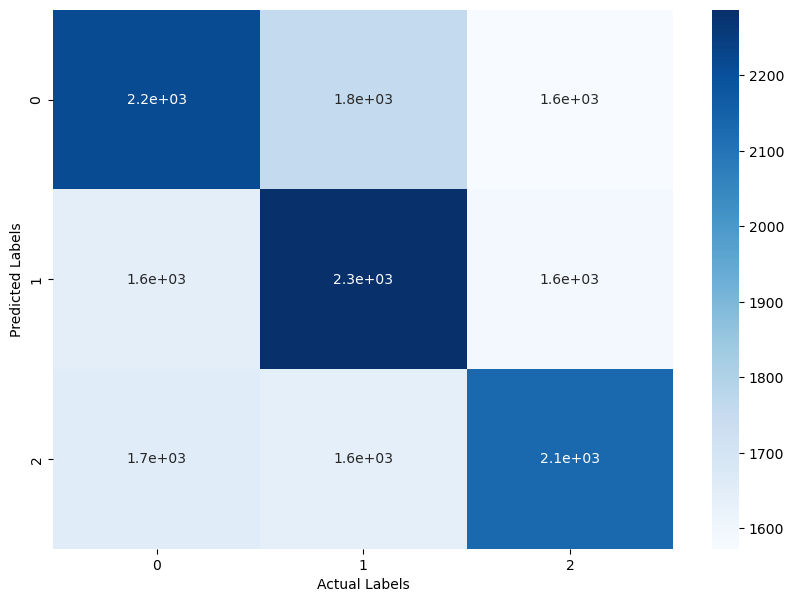

C:\Users\kisho\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[07:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model Name: XGBoost
Accuracy :  0.34724075197089144
Classification Report : 
                precision    recall  f1-score   support

           0       0.35      0.33      0.34      5541
           1       0.35      0.38      0.36      5522
           2       0.34      0.34      0.34      5427

    accuracy                           0.35     16490
   macro avg       0.35      0.35      0.35     16490
weighted avg       0.35      0.35      0.35     16490

ROC AUC Score :  0.5175321738856034


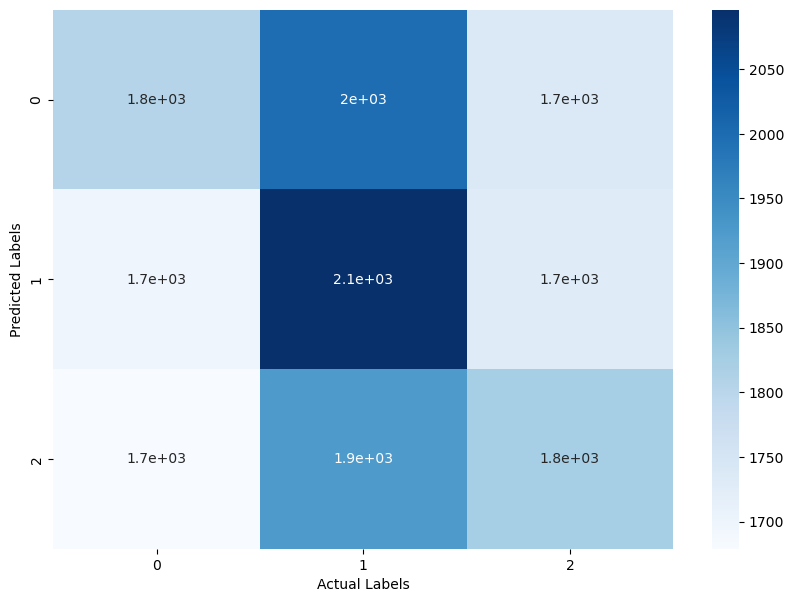



Model Name: Naive_Bayes
Accuracy :  0.33565797453001817
Classification Report : 
                precision    recall  f1-score   support

           0       0.34      0.24      0.28      5541
           1       0.34      0.43      0.38      5522
           2       0.33      0.34      0.33      5427

    accuracy                           0.34     16490
   macro avg       0.34      0.34      0.33     16490
weighted avg       0.34      0.34      0.33     16490

ROC AUC Score :  0.5013421737120114


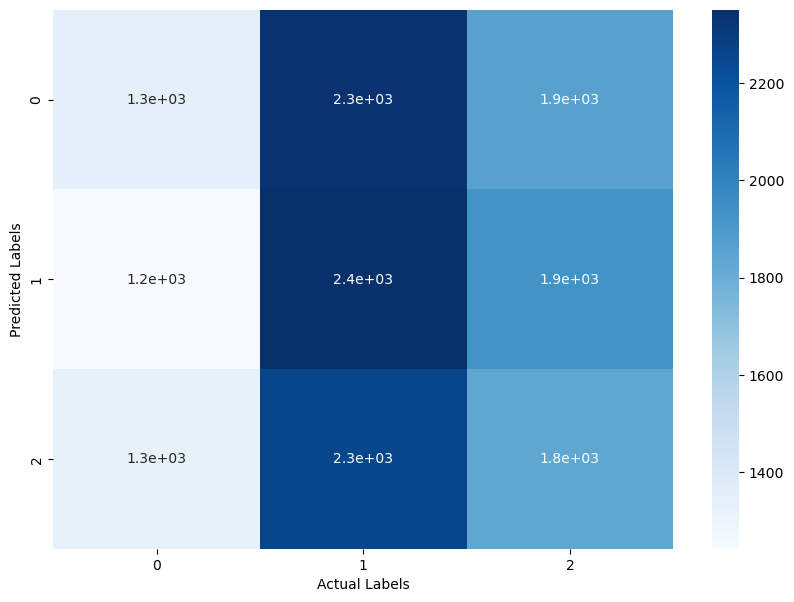



Model Name: K_Nearest_Neighbors
Accuracy :  0.34032747119466344
Classification Report : 
                precision    recall  f1-score   support

           0       0.34      0.45      0.39      5541
           1       0.35      0.35      0.35      5522
           2       0.34      0.21      0.26      5427

    accuracy                           0.34     16490
   macro avg       0.34      0.34      0.33     16490
weighted avg       0.34      0.34      0.33     16490

ROC AUC Score :  0.5104439022214572


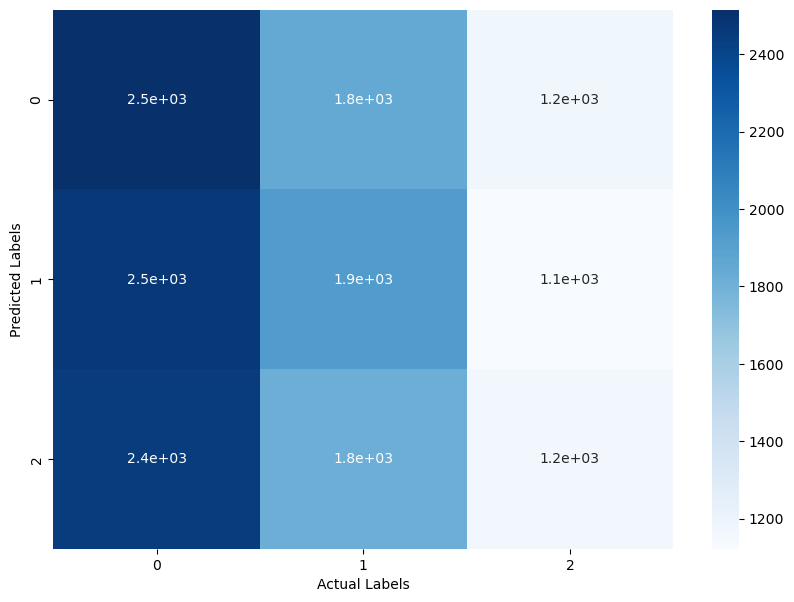



Model Name: Decision_Tree
Accuracy :  0.37058823529411766
Classification Report : 
                precision    recall  f1-score   support

           0       0.37      0.37      0.37      5541
           1       0.37      0.38      0.37      5522
           2       0.37      0.36      0.37      5427

    accuracy                           0.37     16490
   macro avg       0.37      0.37      0.37     16490
weighted avg       0.37      0.37      0.37     16490

ROC AUC Score :  0.5278034544886038


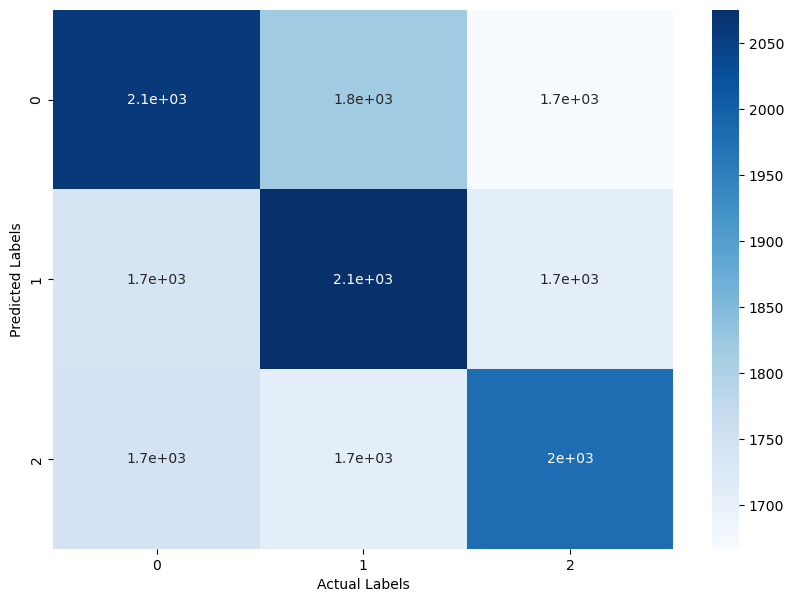

In [512]:
models = { "Logistic_Regression": LogisticRegression(max_iter=1000),
    "Random_Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive_Bayes": GaussianNB(),
    "K_Nearest_Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision_Tree": DecisionTreeClassifier(random_state=42) }


def evaluate_model(model,X_train,X_test,y_train,y_test,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f'Model Name: {model_name}')
    print('Accuracy : ',accuracy_score(y_test,y_pred))
    #print('Precission : ',precision_score(y_test,y_pred,average='macro'))
    #print('Recall : ',recall_score(y_test,y_pred,average='macro'))
    
    print('Classification Report : \n ',classification_report(y_test,y_pred))
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        print('ROC AUC Score : ', roc_auc_score(y_test, y_prob, multi_class='ovr'))
    else:
        print('ROC AUC Score cannot be calculated for this model.')

    plt.figure(figsize = (10,7))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'Blues')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.show()
    
    print('\n')

for model_name,model in models.items():
    evaluate_model(model,X_train,X_test,y_train,y_test,model_name)

In [513]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [514]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation ='relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\kisho\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,267 (44.01 KB)

 Trainable params: 11,267 (44.01 KB)

 Non-trainable params: 0 (0.00 B)

In [515]:
history = model.fit(X_train,y_train,epochs = 10,batch_size = 32,validation_data = (X_test,y_test))

Epoch 1/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3333 - loss: 1.2180 - val_accuracy: 0.3291 - val_loss: 1.2644
Epoch 2/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3298 - loss: 1.1482 - val_accuracy: 0.3349 - val_loss: 1.2613
Epoch 3/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3372 - loss: 1.1330 - val_accuracy: 0.3377 - val_loss: 1.1181
Epoch 4/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3294 - loss: 1.1195 - val_accuracy: 0.3340 - val_loss: 1.1042
Epoch 5/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3378 - loss: 1.1091 - val_accuracy: 0.3344 - val_loss: 1.1051
Epoch 6/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3370 - loss: 1.1047 - val_accuracy: 0.3347 - val_loss: 1.1035
Epoch 7/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3349 - loss: 1.1022 - val_accuracy: 0.3349 - val_loss: 1.1004
Epoch 8/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3403 - loss: 1.0997 - 

In [516]:
#Saving Model for Deployment
import pickle

for model_name, model_instance in models.items():
    with open(f"models/{model_name}.pkl", 'wb') as file:
        pickle.dump(model_instance, file)
        print(f"Exported {model_name} of type {type(model_instance)}")
        


Exported Logistic_Regression of type <class 'sklearn.linear_model._logistic.LogisticRegression'>
Exported Random_Forest of type <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Exported XGBoost of type <class 'xgboost.sklearn.XGBClassifier'>
Exported Naive_Bayes of type <class 'sklearn.naive_bayes.GaussianNB'>
Exported K_Nearest_Neighbors of type <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Exported Decision_Tree of type <class 'sklearn.tree._classes.DecisionTreeClassifier'>
